# Business logic

1. Retrieve current users from database
2. Extract data and compute SPI
3. Extract data and compute TPI
4. Extract data and compute EPI
5. Extract data and compute API
6. Extract data and compute VPI


## 1. Retrieve current users from database

### Connect to database

In [20]:
import requests
import mariadb
import sys
import pandas       as pd
import numpy        as np
import datetime     as dt
from scipy              import stats
from pandas.api.types   import is_numeric_dtype


# Connect to MariaDB Platform
try:
    conn = mariadb.connect(
        user="admin_vtx",
        password="Prueba12#",
        host="develop-free-vtx.csgmphwpjwca.us-east-1.rds.amazonaws.com",
        port=3306,
        database="catalogs"
    )
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Get Cursor
cur = conn.cursor()

Retrieve users

In [2]:
cur.execute("SELECT * FROM users;")

ids = []
names = []
instagram_usernames = []
facebook_usernames = []
twitter_usernames = []
genders = []
dates_of_birth = []
sports_athletes = []
positions_athletes = []
emails = []

for id, name, instagram_username, facebook_username, twitter_username, last_update, gender, date_of_birth, sport, position, email in cur: 
    ids.append(id)
    names.append(name)
    instagram_usernames.append(instagram_username)
    facebook_usernames.append(facebook_username)
    twitter_usernames.append(twitter_username)
    genders.append(gender)
    dates_of_birth.append(date_of_birth)
    sports_athletes.append(twitter_username)
    positions_athletes.append(twitter_username)

    print(f"name: {name}, instagram_username: {instagram_username}, twitter_username: {twitter_username}, last_update: {last_update}")

name: Stephany Cruz, instagram_username: , twitter_username: , last_update: 2023-01-05 13:53:29
name: Bernardo Uriel Barrondo, instagram_username: , twitter_username: , last_update: 2023-01-05 13:54:17
name: Pepito perez, instagram_username: , twitter_username: , last_update: 2022-12-28 20:32:21
name: Maria Fernanda Peinado, instagram_username: , twitter_username: , last_update: 2023-01-05 13:54:19
name: Danisha Chimillio, instagram_username: , twitter_username: , last_update: 2023-01-05 13:53:36
name: Katya Oliveros, instagram_username: , twitter_username: , last_update: 2023-01-05 13:54:23
name: Maxwell Alvarez, instagram_username: , twitter_username: , last_update: 2023-01-05 13:54:21
name: Guillermo Rivas, instagram_username: , twitter_username: , last_update: 2023-01-05 13:54:25
name: Leonardo Oliveros, instagram_username: , twitter_username: , last_update: 2023-01-05 13:54:26
name: Laura Lainfiesta, instagram_username: , twitter_username: , last_update: 2023-01-05 13:54:29
name: 

## 2. Extract data and compute SPI

In [3]:
url_ig = "http://localhost:6000/api/instagram"
url_tw = "http://localhost:6000/api/twitter"

users_data = []

for ix, id in enumerate(ids):
    user_data_dict = {}
    user_data_dict["id"] = id
    user_data_dict["name"] = names[ix]
    user_data_dict["instagram_username"] = instagram_usernames[ix]
    user_data_dict["twitter_username"] = twitter_usernames[ix]
    print(f"Working on {names[ix]}")
    if user_data_dict["instagram_username"] is not None and user_data_dict["instagram_username"] != "nan" and user_data_dict["instagram_username"] != "":
        print("Getting IG data")
        body = {"username": user_data_dict["instagram_username"]}
        r = requests.post(url_ig, json=body)
        response = r.json()
        user_data_dict["instagram_data"] = response
    else:
        user_data_dict["instagram_data"] = {
                'username': '',
                "user_id_instagram": '',
                'n_followers': 0,
                'n_following': 0,
                'n_posts_total': 0,
                'n_posts_retrieved': 0,
                'n_likes_total': 0,
                'n_likes_retrieved': 0,
                'n_comments_total': 0,
                'n_comments_retrieved': 0,
                'created_at': dt.datetime.now(),
                'sentiment_instagram': 0
            }

    if user_data_dict["twitter_username"] is not None and user_data_dict["twitter_username"] != "nan" and user_data_dict["twitter_username"] != "":
        print("Getting TW data")
        body = {"username": user_data_dict["twitter_username"]}
        r = requests.post(url_tw, json=body)
        response = r.json()
        user_data_dict["twitter_data"] = response
    else:
        user_data_dict["twitter_data"] = {
                'username': '',
                "n_followers": 0,
                'n_retweets': 0,
                'n_tweets': 0,
                'n_retweets_to_user': 0,
                'n_favorites_to_user': 0,
                'n_replies_to_user': 0,
                'created_at': dt.datetime.now(),
                'sentiment_twitter': 0
            }
    
    users_data.append(user_data_dict)
    print(f"Done with {names[ix]}")
    print("----------------------------------")

Working on Stephany Cruz
Done with Stephany Cruz
----------------------------------
Working on Bernardo Uriel Barrondo
Done with Bernardo Uriel Barrondo
----------------------------------
Working on Pepito perez
Done with Pepito perez
----------------------------------
Working on Maria Fernanda Peinado
Done with Maria Fernanda Peinado
----------------------------------
Working on Danisha Chimillio
Done with Danisha Chimillio
----------------------------------
Working on Katya Oliveros
Done with Katya Oliveros
----------------------------------
Working on Maxwell Alvarez
Done with Maxwell Alvarez
----------------------------------
Working on Guillermo Rivas
Done with Guillermo Rivas
----------------------------------
Working on Leonardo Oliveros
Done with Leonardo Oliveros
----------------------------------
Working on Laura Lainfiesta
Done with Laura Lainfiesta
----------------------------------
Working on Sergio Perez
Done with Sergio Perez
----------------------------------
Working on

In [4]:
users_data

[{'id': '001',
  'name': 'Stephany Cruz',
  'instagram_username': '',
  'twitter_username': '',
  'instagram_data': {'username': '',
   'user_id_instagram': '',
   'n_followers': 0,
   'n_following': 0,
   'n_posts_total': 0,
   'n_posts_retrieved': 0,
   'n_likes_total': 0,
   'n_likes_retrieved': 0,
   'n_comments_total': 0,
   'n_comments_retrieved': 0,
   'created_at': datetime.datetime(2023, 1, 5, 9, 2, 24, 995624),
   'sentiment_instagram': 0},
  'twitter_data': {'username': '',
   'n_followers': 0,
   'n_retweets': 0,
   'n_tweets': 0,
   'n_retweets_to_user': 0,
   'n_favorites_to_user': 0,
   'n_replies_to_user': 0,
   'created_at': datetime.datetime(2023, 1, 5, 9, 2, 24, 995624),
   'sentiment_twitter': 0}},
 {'id': '002',
  'name': 'Bernardo Uriel Barrondo',
  'instagram_username': '',
  'twitter_username': '',
  'instagram_data': {'username': '',
   'user_id_instagram': '',
   'n_followers': 0,
   'n_following': 0,
   'n_posts_total': 0,
   'n_posts_retrieved': 0,
   'n_lik

### Compute percentiles and SPIs

In [5]:
def tuned_sigmoid_fair(x):
    return np.clip(1/(0.8+0.2*np.exp(-x/25+4)), a_min=0, a_max=1)*100
def exponential(x):
    return np.clip(np.exp(x/25)/np.exp(4), a_min=0, a_max=1)*100

In [6]:
def compute_spi_ig(x):
    if x["username"] == "":
        return 0
    else:
        spi_ig_weights_dict = {
            "n_followers": 0.1,
            "n_posts_total": 0.1, 
            "n_likes_retrieved": 0.2, 
            "n_comments_retrieved": 0.1, 
            "sentiment_instagram": 0.3, 
            "relative_engagement": 0.2
        }
        spi = 0
        for k in spi_ig_weights_dict.keys():
            spi += spi_ig_weights_dict[k]*x[k]
        return tuned_sigmoid_fair(spi)

def process_ig_data(data):
    users_data_instagram = []
    for user_data in data:
        if ("instagram_data" in user_data.keys()):
            dict_data = user_data["instagram_data"].copy()
            dict_data["user_id"] = user_data["id"]
            users_data_instagram.append(dict_data)
        else:
            empty_dict = {'user_id': users_data["id"],
                        'username': '',
                        "user_id_instagram": '',
                        'n_followers': 0,
                        'n_following': 0,
                        'n_posts_total': 0,
                        'n_posts_retrieved': 0,
                        'n_likes_total': 0,
                        'n_likes_retrieved': 0,
                        'n_comments_total': 0,
                        'n_comments_retrieved': 0,
                        'created_at': '',
                        'sentiment_instagram': 0}
            users_data_instagram.append(empty_dict)
        
    df_ig = pd.DataFrame(users_data_instagram)
    df_ig["relative_engagement"] = df_ig.apply(lambda x: 0 if x["n_followers"] == 0 else np.clip((x["n_likes_retrieved"] + x["n_comments_retrieved"])/(x["n_followers"])*100, 0, 100), axis=1)
    selected_cols = ["username", "n_followers", "n_posts_total", "n_likes_retrieved", "n_comments_retrieved", "sentiment_instagram", "relative_engagement"]
    df_ig_perc = df_ig.copy()
    for col in selected_cols:
        if col == "username":
            pass
        else:
            df_ig_perc[col] = df_ig_perc[col].apply(lambda x: stats.percentileofscore(df_ig_perc[df_ig_perc["username"] != ""][col], x))
    df_ig_perc["spi"] = df_ig_perc[selected_cols].apply(compute_spi_ig, axis=1)
    spi_ig_columns = ["user_id", "username", "n_followers", "n_posts_total", "n_likes_retrieved", "n_comments_retrieved", "sentiment_instagram", "relative_engagement"]
    return pd.concat([df_ig[spi_ig_columns], df_ig_perc["spi"], df_ig["created_at"]], axis=1)



In [7]:
processed_ig_data = process_ig_data(users_data)
processed_ig_data

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19412\2738678425.py:41: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_ig = pd.DataFrame(users_data_instagram)


,user_id,username,n_followers,n_posts_total,n_likes_retrieved,n_comments_retrieved,sentiment_instagram,relative_engagement,spi,created_at
0,001,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624


In [14]:
def compute_spi_fb(x):
    if x["username"] == "":
        return 0
    else:
        spi_fb_weights_dict = {
            "n_followers": 0.1,
            "n_posts_total": 0.1, 
            "n_likes_retrieved": 0.2, 
            "n_comments_retrieved": 0.1, 
            "sentiment_instagram": 0.3, 
            "relative_engagement": 0.2
        }
        spi = 0
        for k in spi_fb_weights_dict.keys():
            spi += spi_fb_weights_dict[k]*x[k]
        return tuned_sigmoid_fair(spi)

def process_fb_data(data):
    users_data_facebook = []
    for user_data in data:
        if ("instagram_data" in user_data.keys()):
            dict_data = user_data["instagram_data"].copy()
            dict_data["user_id"] = user_data["id"]
            users_data_facebook.append(dict_data)
        else:
            empty_dict = {'user_id': users_data["id"],
                        'username': '',
                        "user_id_instagram": '',
                        'n_followers': 0,
                        'n_following': 0,
                        'n_posts_total': 0,
                        'n_posts_retrieved': 0,
                        'n_likes_total': 0,
                        'n_likes_retrieved': 0,
                        'n_comments_total': 0,
                        'n_comments_retrieved': 0,
                        'created_at': '',
                        'sentiment_instagram': 0}
            users_data_facebook.append(empty_dict)
        
    df_fb = pd.DataFrame(users_data_facebook)
    df_fb["relative_engagement"] = df_fb.apply(lambda x: 0 if x["n_followers"] == 0 else np.clip((x["n_likes_retrieved"] + x["n_comments_retrieved"])/(x["n_followers"])*100, 0, 100), axis=1)
    selected_cols = ["username", "n_followers", "n_posts_total", "n_likes_retrieved", "n_comments_retrieved", "sentiment_instagram", "relative_engagement"]
    df_fb_perc = df_fb.copy()
    for col in selected_cols:
        if col == "username":
            pass
        else:
            df_fb_perc[col] = df_fb_perc[col].apply(lambda x: stats.percentileofscore(df_fb_perc[df_fb_perc["username"] != ""][col], x))
    df_fb_perc["spi"] = df_fb_perc[selected_cols].apply(compute_spi_ig, axis=1)
    spi_fb_columns = ["user_id", "username", "n_followers", "n_posts_total", "n_likes_retrieved", "n_comments_retrieved", "sentiment_instagram", "relative_engagement"]
    return pd.concat([df_fb[spi_fb_columns], df_fb_perc["spi"], df_fb["created_at"]], axis=1)


In [15]:
processed_fb_data = process_fb_data(users_data)
processed_fb_data

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19412\2215217365.py:41: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_fb = pd.DataFrame(users_data_facebook)


,user_id,username,n_followers,n_posts_total,n_likes_retrieved,n_comments_retrieved,sentiment_instagram,relative_engagement,spi,created_at
0,001,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624


In [16]:
def compute_spi_tw(x):
    if x["username"] == "":
        return 0
    else:
        spi_ig_weights_dict = {
            "n_followers": 0.1,
            "n_retweets": 0.1, 
            "n_tweets": 0.1, 
            "n_retweets_to_user": 0.1, 
            "n_favorites_to_user": 0.1, 
            "n_replies_to_user": 0.1,
            "sentiment_twitter": 0.3,
            "relative_engagement": 0.1
        }
        spi = 0
        for k in spi_ig_weights_dict.keys():
            spi += spi_ig_weights_dict[k]*x[k]
        return tuned_sigmoid_fair(spi)

def process_tw_data(data):
    users_data_twitter = []
    for user_data in data:
        if ("twitter_data" in user_data.keys()):
            dict_data = user_data["twitter_data"].copy()
            dict_data["user_id"] = user_data["id"]
            users_data_twitter.append(dict_data)
        else:
            empty_dict = {'user_id': user_data["id"],
                        'username': '',
                        "n_followers": 0,
                        'n_retweets': 0,
                        'n_tweets': 0,
                        'n_retweets_to_user': 0,
                        'n_favorites_to_user': 0,
                        'n_replies_to_user': 0,
                        'created_at': dt.now(),
                        'sentiment_twitter': 0}
            users_data_twitter.append(empty_dict)
    
    df_tw = pd.DataFrame(users_data_twitter)
    df_tw["relative_engagement"] = (df_tw.apply(lambda x: (x["n_favorites_to_user"] + x["n_retweets_to_user"] + x["n_replies_to_user"])/(x["n_followers"])*100 if x["n_tweets"] > 0 else 0, axis=1))
    selected_cols = ["username", "n_followers", "n_retweets", "n_tweets", "n_retweets_to_user", "n_favorites_to_user", "n_replies_to_user", "sentiment_twitter", "relative_engagement"]
    df_tw_perc = df_tw.copy()
    for col in selected_cols:
        if col == "username":
            pass
        else:
            df_tw_perc[col] = df_tw_perc[col].apply(lambda x: stats.percentileofscore(df_tw_perc[df_tw_perc["username"] != ""][col], x))
    df_tw_perc["spi"] = df_tw_perc[selected_cols].apply(compute_spi_tw, axis=1)
    spi_tw_columns = ["user_id","username","n_followers","n_retweets","n_tweets","n_retweets_to_user","n_favorites_to_user","n_replies_to_user","sentiment_twitter","relative_engagement"]
    return pd.concat([df_tw[spi_tw_columns], df_tw_perc["spi"], df_tw["created_at"]], axis=1)

In [17]:
processed_tw_data = process_tw_data(users_data)
processed_tw_data

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19412\1238482710.py:40: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_tw = pd.DataFrame(users_data_twitter)


,user_id,username,n_followers,n_retweets,n_tweets,n_retweets_to_user,n_favorites_to_user,n_replies_to_user,sentiment_twitter,relative_engagement,spi,created_at
0,001,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624


### Check if there are any records in instagram table or twitter table for each user

If there are no records the spi stays the same. Else, spi bonus is computed and added to spi

#### Instagram

In [25]:
def input_ig_data(cur, record):
    record_dict = record.to_dict('records')[0]
    cur.execute("INSERT INTO instagram_stats(user_id, instagram_username, n_followers, n_posts_total, n_likes_retrieved, n_comments_retrieved, sentiment, engagement, spi, created_at) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, now());",
      (record_dict["user_id"], record_dict["username"], record_dict["n_followers"], record_dict["n_posts_total"], record_dict["n_likes_retrieved"], record_dict["n_comments_retrieved"], record_dict["sentiment_instagram"], record_dict["relative_engagement"], record_dict["spi"]))

def retrieve_latest_record_ig(user_id):
    cur.execute(f"SELECT * FROM instagram_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for record_id, user_id, instagram_username, n_followers, n_posts_total, n_likes_retrieved, n_comments_retrieved, sentiment, engagement, spi, created_at in cur:
        record_dict = {
            "user_id": user_id,
            "username": instagram_username,
            "n_followers": n_followers,
            "n_posts_total": n_posts_total,
            "n_likes_retrieved": n_likes_retrieved,
            "n_comments_retrieved": n_comments_retrieved,
            "sentiment_instagram": sentiment,
            "relative_engagement": engagement,
            "spi": spi,
            "created_at": created_at
        }
    return pd.DataFrame(record_dict, index=[0])

def compute_definitive_ig_spi(user_id, new_record, bonus_weight=0.15):
    cur.execute(f"SELECT COUNT(*) FROM instagram_stats WHERE user_id = '{user_id}';") 
    for result in cur: 
        count_records = result[0]
    if count_records == 0:
        return new_record
    else: 
        
        dict_change = {}
        num_cols = [col for col in new_record.columns if is_numeric_dtype(new_record[col])]
        dict_change["username"] = new_record["username"].unique()[0]

        latest_record_db = retrieve_latest_record_ig(user_id)
        
        for col in num_cols:
            dict_change[col] = new_record.loc[0][col] - latest_record_db.loc[0][col]
            
        df_change = pd.DataFrame(dict_change, index=[0])
        
        dict_relative_change = {}
        dict_change = df_change.to_dict('records')[0]
        dict_base = latest_record_db.loc[0].to_dict()

        for key in dict_change.keys():
            if key == "username":
                dict_relative_change[key] = dict_change[key]
            elif key == "created_at" or key == "spi":
                pass
            else:
                if dict_base[key] == 0 and dict_change[key] != 0:
                    dict_relative_change[key] = 1
                elif dict_base[key] == 0 and dict_change[key] == 0:
                    dict_relative_change[key] = 0
                else:
                    dict_relative_change[key] = dict_change[key] / dict_base[key]
                    
        dict_ig_spi_bonus_weight = {
            'n_followers': 0.1,
            'n_posts_total': 0.1,
            'n_likes_retrieved': 0.1,
            'n_comments_retrieved': 0.1,
            'sentiment_instagram': 0.4,
            'relative_engagement': 0.2
        }
        bonus_spi = 0
        for k in dict_relative_change.keys():
            if k != "username" and k != "user_id":
                bonus_spi += max(0, dict_ig_spi_bonus_weight[k]*dict_relative_change[k])

        new_record_upd = new_record.copy()
        if bonus_spi == 0:
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"], a_min=0, a_max=100)  
        else:     
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"] + bonus_weight*exponential(bonus_spi*100), a_min=0, a_max=100) 
        return new_record_upd[:1]


In [26]:
processed_ig_data

,user_id,username,n_followers,n_posts_total,n_likes_retrieved,n_comments_retrieved,sentiment_instagram,relative_engagement,spi,created_at
0,001,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624


In [27]:
df_updated_ig = pd.DataFrame()
for user_id in processed_ig_data["user_id"].unique():
    new_record = processed_ig_data[processed_ig_data["user_id"] == user_id].reset_index().drop("index", axis=1)
    df_updated_ig = pd.concat([df_updated_ig, compute_definitive_ig_spi(user_id, new_record)], axis=0, ignore_index=True)
df_updated_ig

,user_id,username,n_followers,n_posts_total,n_likes_retrieved,n_comments_retrieved,sentiment_instagram,relative_engagement,spi,created_at
0,001,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624


This is the flow evey night at 12am:

1. Query the usernames of social media in users table
2. Extract data from social media apis
3. Compute percentiles and spis
4. If there are existing records of the users in the social media tables, spi bonus is computed 
and added to base spi. Else, no bonus is added, spi stays the same
5. spis of all social media are computed into a general SPI per user
6. Input the data to the database (instagram_stats, twitter_stats, spis)

In [28]:
df_ig_fully_proc = pd.DataFrame()
for user_id in processed_ig_data["user_id"].unique():
    new_record = processed_ig_data[processed_ig_data["user_id"] == user_id].reset_index().drop("index", axis=1)
    record_updated = compute_definitive_ig_spi(user_id, new_record)
    df_ig_fully_proc = pd.concat([df_ig_fully_proc, record_updated], axis=0, ignore_index=True)
    input_ig_data(cur, record_updated)

df_ig_fully_proc

,user_id,username,n_followers,n_posts_total,n_likes_retrieved,n_comments_retrieved,sentiment_instagram,relative_engagement,spi,created_at
0,001,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624


In [29]:
conn.commit()

#### Facebook

In [21]:
def input_fb_data(cur, record):
    record_dict = record.to_dict('records')[0]
    cur.execute("INSERT INTO facebook_stats(user_id, facebook_username, n_followers, n_posts_total, n_likes_retrieved, n_comments_retrieved, sentiment, engagement, spi, created_at) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, now());",
      (record_dict["user_id"], record_dict["username"], record_dict["n_followers"], record_dict["n_posts_total"], record_dict["n_likes_retrieved"], record_dict["n_comments_retrieved"], record_dict["sentiment_instagram"], record_dict["relative_engagement"], record_dict["spi"]))

def retrieve_latest_record_fb(user_id):
    cur.execute(f"SELECT * FROM facebook_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for record_id, user_id, instagram_username, n_followers, n_posts_total, n_likes_retrieved, n_comments_retrieved, sentiment, engagement, spi, created_at in cur:
        record_dict = {
            "user_id": user_id,
            "username": instagram_username,
            "n_followers": n_followers,
            "n_posts_total": n_posts_total,
            "n_likes_retrieved": n_likes_retrieved,
            "n_comments_retrieved": n_comments_retrieved,
            "sentiment_instagram": sentiment,
            "relative_engagement": engagement,
            "spi": spi,
            "created_at": created_at
        }
    return pd.DataFrame(record_dict, index=[0])

def compute_definitive_fb_spi(user_id, new_record, bonus_weight=0.15):
    cur.execute(f"SELECT COUNT(*) FROM facebook_stats WHERE user_id = '{user_id}';") 
    for result in cur: 
        count_records = result[0]
    if count_records == 0:
        return new_record
    else: 
        
        dict_change = {}
        num_cols = [col for col in new_record.columns if is_numeric_dtype(new_record[col])]
        dict_change["username"] = new_record["username"].unique()[0]

        latest_record_db = retrieve_latest_record_ig(user_id)
        
        for col in num_cols:
            dict_change[col] = new_record.loc[0][col] - latest_record_db.loc[0][col]
            
        df_change = pd.DataFrame(dict_change, index=[0])
        
        dict_relative_change = {}
        dict_change = df_change.to_dict('records')[0]
        dict_base = latest_record_db.loc[0].to_dict()

        for key in dict_change.keys():
            if key == "username":
                dict_relative_change[key] = dict_change[key]
            elif key == "created_at" or key == "spi":
                pass
            else:
                if dict_base[key] == 0 and dict_change[key] != 0:
                    dict_relative_change[key] = 1
                elif dict_base[key] == 0 and dict_change[key] == 0:
                    dict_relative_change[key] = 0
                else:
                    dict_relative_change[key] = dict_change[key] / dict_base[key]
                    
        dict_fb_spi_bonus_weight = {
            'n_followers': 0.1,
            'n_posts_total': 0.1,
            'n_likes_retrieved': 0.1,
            'n_comments_retrieved': 0.1,
            'sentiment_instagram': 0.4,
            'relative_engagement': 0.2
        }
        bonus_spi = 0
        for k in dict_relative_change.keys():
            if k != "username" and k != "user_id":
                bonus_spi += max(0, dict_fb_spi_bonus_weight[k]*dict_relative_change[k])

        new_record_upd = new_record.copy()
        if bonus_spi == 0:
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"], a_min=0, a_max=100)  
        else:     
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"] + bonus_weight*exponential(bonus_spi*100), a_min=0, a_max=100) 
        return new_record_upd[:1]

In [22]:
df_updated_fb = pd.DataFrame()
for user_id in processed_fb_data["user_id"].unique():
    new_record = processed_fb_data[processed_fb_data["user_id"] == user_id].reset_index().drop("index", axis=1)
    df_updated_fb = pd.concat([df_updated_fb, compute_definitive_fb_spi(user_id, new_record)], axis=0, ignore_index=True)
df_updated_fb

,user_id,username,n_followers,n_posts_total,n_likes_retrieved,n_comments_retrieved,sentiment_instagram,relative_engagement,spi,created_at
0,001,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624


In [23]:
df_fb_fully_proc = pd.DataFrame()
for user_id in processed_fb_data["user_id"].unique():
    new_record = processed_fb_data[processed_fb_data["user_id"] == user_id].reset_index().drop("index", axis=1)
    record_updated = compute_definitive_fb_spi(user_id, new_record)
    df_fb_fully_proc = pd.concat([df_fb_fully_proc, record_updated], axis=0, ignore_index=True)
    input_fb_data(cur, record_updated)

df_fb_fully_proc

,user_id,username,n_followers,n_posts_total,n_likes_retrieved,n_comments_retrieved,sentiment_instagram,relative_engagement,spi,created_at
0,001,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0.000000,0.000000,0.000000,2023-01-05 09:02:24.995624


In [24]:
conn.commit()

#### Twitter

In [30]:
def input_tw_data(cur, record):
    record_dict = record.to_dict('records')[0]
    cur.execute("INSERT INTO twitter_stats(user_id, twitter_username, n_followers, n_retweets , n_tweets , n_retweets_to_user , n_favorites_to_user, n_replies_to_user, sentiment, engagement, spi, created_at) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, now());",
      (record_dict["user_id"], record_dict["username"], record_dict["n_followers"], record_dict["n_retweets"], record_dict["n_tweets"], record_dict["n_retweets_to_user"], record_dict["n_favorites_to_user"], record_dict["n_replies_to_user"], record_dict["sentiment_twitter"], record_dict["relative_engagement"], record_dict["spi"]))

def retrieve_latest_record_tw(user_id):
    cur.execute(f"SELECT * FROM twitter_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for record_id, user_id, twitter_username, n_followers, n_retweets, n_tweets, n_retweets_to_user, n_favorites_to_user, n_replies_to_user, sentiment, engagement, spi, created_at in cur:
        record_dict = {
            "user_id": user_id,
            "username": twitter_username,
            "n_followers": n_followers,
            "n_retweets": n_retweets,
            "n_tweets": n_tweets,
            "n_retweets_to_user": n_retweets_to_user,
            "n_favorites_to_user": n_favorites_to_user,
            "n_replies_to_user": n_replies_to_user,
            "sentiment_twitter": sentiment,
            "relative_engagement": engagement,
            "spi": spi,
            "created_at": created_at
        }
    return pd.DataFrame(record_dict, index=[0])
      

def compute_definitive_tw_spi(user_id, new_record, bonus_weight=0.15):
    cur.execute(f"SELECT COUNT(*) FROM twitter_stats WHERE user_id = '{user_id}';") 
    for result in cur: 
        count_records = result[0]
    if count_records == 0:
        return new_record
    else: 
        
        dict_change = {}
        num_cols = [col for col in new_record.columns if is_numeric_dtype(new_record[col])]
        dict_change["username"] = new_record["username"].unique()[0]

        latest_record_db = retrieve_latest_record_tw(user_id)
        for col in num_cols:
            dict_change[col] = new_record.loc[0][col] - latest_record_db.loc[0][col]
            
        df_change = pd.DataFrame(dict_change, index=[0])
        
        dict_relative_change = {}
        dict_change = df_change.to_dict('records')[0]
        dict_base = latest_record_db.loc[0].to_dict()

        for key in dict_change.keys():
            if key == "username":
                dict_relative_change[key] = dict_change[key]
            elif key == "created_at" or key == "spi":
                pass
            else:
                if dict_base[key] == 0 and dict_change[key] != 0:
                    dict_relative_change[key] = 1
                elif dict_base[key] == 0 and dict_change[key] == 0:
                    dict_relative_change[key] = 0
                else:
                    dict_relative_change[key] = dict_change[key] / dict_base[key]
                    
        dict_tw_spi_bonus_weight = {
        'n_followers': 0.1,
        'n_retweets': 0.1,
        'n_tweets': 0.1,
        'n_retweets_to_user': 0.1,
        'n_favorites_to_user': 0.1,
        'n_replies_to_user': 0.1,
        'sentiment_twitter': 0.3,
        'relative_engagement': 0.1
    }

        bonus_spi = 0
        for k in dict_relative_change.keys():
            if k != "username" and k != "user_id":
                bonus_spi += max(0, dict_tw_spi_bonus_weight[k]*dict_relative_change[k])

        new_record_upd = new_record.copy()
        if bonus_spi == 0:
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"], a_min=0, a_max=100) 
        else:
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"] + bonus_weight*exponential(bonus_spi*100), a_min=0, a_max=100) 

        return new_record_upd[:1]

In [31]:
processed_tw_data

,user_id,username,n_followers,n_retweets,n_tweets,n_retweets_to_user,n_favorites_to_user,n_replies_to_user,sentiment_twitter,relative_engagement,spi,created_at
0,001,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624


In [32]:
df_tw_fully_proc = pd.DataFrame()
for user_id in processed_tw_data["user_id"].unique():
    new_record = processed_tw_data[processed_tw_data["user_id"] == user_id].reset_index().drop("index", axis=1)
    record_updated = compute_definitive_tw_spi(user_id, new_record)
    df_tw_fully_proc = pd.concat([df_tw_fully_proc, record_updated], axis=0, ignore_index=True)
    input_tw_data(cur, record_updated)

df_tw_fully_proc

,user_id,username,n_followers,n_retweets,n_tweets,n_retweets_to_user,n_favorites_to_user,n_replies_to_user,sentiment_twitter,relative_engagement,spi,created_at
0,001,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
1,002,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
3,003,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
4,004,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
5,005,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
6,006,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
7,007,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
8,008,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624
9,009,,0,0,0,0,0,0,0.0,0,0.000000,2023-01-05 09:02:24.995624


In [33]:
conn.commit()

In [61]:
def input_spi_data(cur, record):
        record_dict = record.to_dict('records')[0]
        cur.execute("INSERT INTO spis(user_id, spi, spi_instagram, spi_facebook, spi_twitter, created_at) VALUES (?, ?, ?, ?, ?, now());",
        (record_dict["user_id"], record_dict["spi"], record_dict["spi_facebook"], record_dict["spi_instagram"], record_dict["spi_twitter"]))

def agg_spi(x):
    if x["n_posts_total_instagram"] == 0 and x["n_posts_total_facebook"] == 0 and x["n_tweets"] == 0:
        return (x["spi_instagram"] + x["spi_facebook"] + x["spi_twitter"])/3
    else:
        return (x["n_posts_total_instagram"]*x["spi_instagram"] + x["n_posts_total_facebook"]*x["spi_facebook"] + x["n_tweets"]*x["spi_twitter"])/(x["n_posts_total_instagram"]+x["n_posts_total_facebook"]+x["n_tweets"])

spi_df = pd.merge(df_ig_fully_proc[["user_id", "spi", "n_posts_total"]], df_fb_fully_proc[["user_id", "spi", "n_posts_total"]], on="user_id", suffixes=["_instagram", "_facebook"])
spi_df = pd.merge(spi_df, df_tw_fully_proc[["user_id", "spi", "n_tweets"]].rename(columns={"spi": "spi_twitter"}), on="user_id")
spi_df["spi"] = spi_df.apply(agg_spi, axis=1)

for user_id in spi_df["user_id"].unique():
    new_record = spi_df[spi_df["user_id"] == user_id].reset_index().drop("index", axis=1)
    input_spi_data(cur, new_record) 

In [60]:
spi_df

,user_id,spi_instagram,n_posts_total_instagram,spi_facebook,n_posts_total_facebook,spi_twitter,n_tweets,spi
0,001,0.000000,0,0.000000,0,0.000000,0,0.000000
1,002,0.000000,0,0.000000,0,0.000000,0,0.000000
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,0.000000,0,0.000000,0,0.000000,0,0.000000
3,003,0.000000,0,0.000000,0,0.000000,0,0.000000
4,004,0.000000,0,0.000000,0,0.000000,0,0.000000
5,005,0.000000,0,0.000000,0,0.000000,0,0.000000
6,006,0.000000,0,0.000000,0,0.000000,0,0.000000
7,007,0.000000,0,0.000000,0,0.000000,0,0.000000
8,008,0.000000,0,0.000000,0,0.000000,0,0.000000
9,009,0.000000,0,0.000000,0,0.000000,0,0.000000


In [62]:
conn.commit()

## 3. Extract data and compute TPI

In [162]:
import os
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_bool_dtype

from datetime import datetime as dt
from datetime import date
import math
import mariadb
import sys


pd.set_option('display.max_columns', None)

DATA_PATH = "../../Data new/" 

In [163]:
def compute_difference(df):
    df_cp = df.copy()
    df_cp = df_cp.reset_index().drop("index", axis=1)
    df_dif = df_cp[:1].copy()

    num_cols = [col for col in df_cp.columns if (is_numeric_dtype(df_cp[col]) and not is_bool_dtype(df_cp[col]))]
    for col in num_cols:
        df_dif.loc[0, col] = abs(abs(df_cp.loc[0, col]) - abs(df_cp.loc[1, col]))   
    
    df_dif.loc[0, "Side"] = "Difference"
    df_dif = pd.concat([df_cp, df_dif], axis=0, ignore_index=True)
    return df_dif

In [164]:
import os

# Load "resumen de datos" file
df_sts = pd.read_excel(DATA_PATH+"Resumen de datos.xlsx", skiprows=1, dtype={"Codigo": str} )

DATA_PATH_ATHLETES = DATA_PATH + "Atletas/"
athlete_folders = os.listdir(DATA_PATH_ATHLETES)

def get_athlete_data(athlete_folder):
    print(f"Working on {athlete_folder}")
    # Get the path of the folder
    athlete_folder_path = DATA_PATH_ATHLETES + athlete_folder + "/"
    # Get the latest phase folder
    phase_folders = os.listdir(athlete_folder_path)
    phase_folders.sort()
    phase_folder_path = athlete_folder_path + phase_folders[-1] + "/"

    athlete_code = athlete_folder.split(" ")[0]
    athlete_data = {
        "athlete_code": athlete_code,
        "folder": athlete_folder,
        "phase": phase_folders[-1]
    }

    files_in_phase = os.listdir(phase_folder_path)

    # Methabolic measures file
    methabolic_filename = ""
    posible_methabolic_files = [filename for filename in files_in_phase if "inbody" in filename]
    if len(posible_methabolic_files) == 0:
        print("No Inbody file for this athlete")
    for posible_methabolic_filename in posible_methabolic_files:
        methabolic_filename = posible_methabolic_filename
        if ".csv" in posible_methabolic_filename:
            df_methabolic = pd.read_csv(phase_folder_path+methabolic_filename)
    
    try:
        athlete_data["Weight"] = df_methabolic["15. Weight"].values[0]
        athlete_data["PBF"] = df_methabolic["22. PBF (Percent Body Fat)"].values[0]
        athlete_data["SMM"] = df_methabolic["20. SMM (Skeletal Muscle Mass)"].values[0]
        athlete_data["%SMM"] = df_methabolic["20. SMM (Skeletal Muscle Mass)"].values[0]/df_methabolic["15. Weight"].values[0]*100
    except: 
        athlete_data["Weight"] = "nan"
        athlete_data["PBF"] = "nan"
        athlete_data["SMM"] = "nan"
        athlete_data["%SMM"] = "nan"

    # Biomechanical assessment report
    biomech_filename = ""
    posible_biomech_files = [filename for filename in files_in_phase if "human" in filename]
    if len(posible_biomech_files) == 0:
        print("No HumanTrak file for this athlete")
    else:
        for posible_biomech_filename in posible_biomech_files:
            biomech_filename = posible_biomech_filename
            if ".csv" in posible_biomech_filename:
                df_biomech_header = pd.read_csv(phase_folder_path+biomech_filename, header=None, skiprows=2, index_col=2, nrows=1).reset_index()
                df_biomech_header = df_biomech_header.loc[0].values
                df_biomech = pd.read_csv(phase_folder_path+biomech_filename, skiprows=2, usecols=list(range(len(df_biomech_header))))
    try:
        athlete_data["Cervical Lateral Flexion ROM"] = df_biomech[df_biomech["TestName"] == "Cervical Lateral Flexion"]["CervicalLFTotalRange"].values[0]
    except:
        athlete_data["Cervical Lateral Flexion ROM"] = "nan"
    
    try:
        athlete_data["Cervical Flexion/Extension ROM"] = df_biomech[df_biomech["TestName"] == "Cervical Flexion/Extension"]["CervicalFETotalRange"].values[0]
    except:
        athlete_data["Cervical Flexion/Extension ROM"] = "nan"

    try:
        df_single_leg_squat = df_biomech[df_biomech["TestName"] == "Single Leg Squat"][["Side","Peak01KneeFlexion", "Peak02KneeFlexion", "Peak03KneeFlexion"]]
        df_single_leg_squat_diff = compute_difference(df_single_leg_squat)
        athlete_data["SingleLegSquat KneeFlexion imbalance"] = df_single_leg_squat_diff[["Peak01KneeFlexion", "Peak02KneeFlexion",	"Peak03KneeFlexion"]].loc[2].mean()
    except:
        athlete_data["SingleLegSquat KneeFlexion imbalance"] = "nan"

    try:
        df_standing = df_biomech[df_biomech["TestName"] == "Standing Posture (5 seconds)"][["AvgHeadBalance","AvgLateralSpineTilt", "AvgHipBalance"]]
        athlete_data["StandingAsymmetry Neck Lateral flexion"] = df_standing["AvgHeadBalance"].values[0]
        athlete_data["StandingAsymmetry Trunk lateral flexion"] = df_standing["AvgLateralSpineTilt"].values[0]
        athlete_data["StandingAsymmetry Pelvis lateral tilt"] = df_standing["AvgHipBalance"].values[0]
    except:
        athlete_data["StandingAsymmetry Neck Lateral flexion"] = "nan"
        athlete_data["StandingAsymmetry Trunk lateral flexion"] = "nan"
        athlete_data["StandingAsymmetry Pelvis lateral tilt"] = "nan"

    try:
        df_shoulder_add_abd = df_biomech[df_biomech["TestName"] == "Shoulder Abduction/Adduction"][["TestName", "Side", "ShoulderPeakAdduction", "ShoulderPeakAbduction"]]
        df_shoulder_add_diff = compute_difference(df_shoulder_add_abd).loc[2]
        athlete_data["ShoulderPeakAdduction imbalance"] = df_shoulder_add_diff["ShoulderPeakAdduction"]
        athlete_data["ShoulderPeakAbduction imbalance"] = df_shoulder_add_diff["ShoulderPeakAbduction"]
    except:
        athlete_data["ShoulderPeakAdduction imbalance"] = "nan"
        athlete_data["ShoulderPeakAbduction imbalance"] = "nan"

    try:
        df_shoulder_flex_ext = df_biomech[df_biomech["TestName"] == "Shoulder Flexion/Extension"][["TestName", "Side", "ShoulderPeakFlexion",	"ShoulderPeakExtension"]]
        df_shoulder_flex_ext_diff = compute_difference(df_shoulder_flex_ext).loc[2]
        athlete_data["ShoulderPeakFlexion imbalance"] = df_shoulder_flex_ext_diff["ShoulderPeakFlexion"]
        athlete_data["ShoulderPeakExtension imbalance"] = df_shoulder_flex_ext_diff["ShoulderPeakExtension"]
    except:
        athlete_data["ShoulderPeakFlexion imbalance"] = "nan"
        athlete_data["ShoulderPeakExtension imbalance"] = "nan"

    try:
        df_hip_rot = df_biomech[df_biomech["TestName"] == "Seated Hip Internal/External Rotation"][["TestName", "Side", "HipPeakInternallRotation","HipPeakExternalRotation"]]
        df_hip_rot_diff = compute_difference(df_hip_rot).loc[2]
        athlete_data["HipPeakInternallRotation imbalance"] = df_hip_rot_diff["HipPeakInternallRotation"]
        athlete_data["HipPeakExternalRotation imbalance"] = df_hip_rot_diff["HipPeakExternalRotation"]
    except: 
        athlete_data["HipPeakInternallRotation imbalance"] = "nan"
        athlete_data["HipPeakExternalRotation imbalance"] = "nan"


    # Jump assessment report
    # Filename usually starts with "Report"
    list_jump_words = ["countermovement", "jump", "squat", "assessment", "forcedeck", "abalakov", "cmj", "sj", "abk"]
    jump_filenames = []
    for filename in files_in_phase:
        for jump_word in list_jump_words:
            if jump_word in filename.lower():
                jump_filenames.append(filename)
    
    if len(jump_filenames) == 0:
        print("No jump assessment reports")
    
    for posible_jump_filename in jump_filenames:
        jump_filename = posible_jump_filename
        if "sj" in jump_filename.lower():
            if ".csv" in jump_filename:
                df_sj = pd.read_csv(phase_folder_path+jump_filename)
                df_sj.columns = [col.strip() for col in df_sj.columns]
        elif "cmj" in jump_filename.lower():
            if ".csv" in jump_filename:
                df_cmj = pd.read_csv(phase_folder_path+jump_filename)
                df_cmj.columns = [col.strip() for col in df_cmj.columns]
        elif "abk" in jump_filename.lower():
            if ".csv" in jump_filename:
                df_abk = pd.read_csv(phase_folder_path+jump_filename)
                df_abk.columns = [col.strip() for col in df_abk.columns]
        elif "forcedeck" in jump_filename.lower():
            if ".csv" in jump_filename:
                df_forcedeck = pd.read_csv(phase_folder_path+jump_filename)
                df_forcedeck.columns = [col.strip() for col in df_forcedeck.columns]
                athlete_data["cmj height"] = df_forcedeck["Jump Height (Imp-Mom) [cm]"].values[0]

    try:
        athlete_data["sj height"] = df_sj['Jump Height (Imp-Mom) [cm]'].values[0]
    except:
        athlete_data["sj height"] = "nan"

    try:
        athlete_data["cmj height"] = df_cmj['Jump Height (Imp-Mom) [cm]'].values[0]
    except: 
        try:
            athlete_data["cmj height"] = df_forcedeck['Jump Height (Imp-Mom) [cm]'].values[0]
        except:
            athlete_data["cmj height"] = "nan"

    try:
        athlete_data["abk height"] = df_abk['Jump Height (Imp-Mom) [cm]'].values[0]
    except: 
        athlete_data["abk height"] = "nan"

    if athlete_data["sj height"] != "nan" and athlete_data["cmj height"] != "nan":
        athlete_data["ie"] = (athlete_data["cmj height"] - athlete_data["sj height"])/(athlete_data["sj height"])*100
    else:
        athlete_data["ie"] = "nan"
    
    # Strength, Resistance and Speed measures
    athlete_srs_df = df_sts[df_sts["Codigo"] == athlete_code]
    if len(athlete_srs_df) == 0:
        print("The athlete is not in the data summary file")
    else:
        athlete_data["Back squat"] = athlete_srs_df["BACK SQUAT (kg)"].values[0]
        athlete_data["Deadlift"] = athlete_srs_df["DEADLIFT (kg)"].values[0]
        athlete_data["Bench press"] = athlete_srs_df["BENCH PRESS (kg)"].values[0]
        athlete_data["Course navette"] = athlete_srs_df["COURSE NAVETTE (Nivel)"].values[0]
        athlete_data["T test"] = athlete_srs_df["T TEST (segs)"].values[0]
        athlete_data["10x5"] = athlete_srs_df["10X5 (segs)"].values[0]
        athlete_data["Cargada"] = athlete_srs_df["Cargada"].values[0]
        athlete_data["Arranque"] = athlete_srs_df["Arranque"].values[0]
    
    return athlete_data       
    

In [165]:
df_general_data = []

cur.execute("SELECT id, name, gender, date_of_birth, sport, position FROM users;")
for id, name, gender, date_of_birth, sport, position in cur:
    df_general_data.append(
        {
            "Código del atleta": id, 
            "Nombre del atleta": name,
            "Sexo": gender, 
            "Fecha de Nacimiento": date_of_birth,
            "Deporte": sport,
            "Posición": position
        }
    )

df_general_data = pd.DataFrame(df_general_data)
df_general_data["Sexo"] = df_general_data["Sexo"].replace({"Female": "Femenino", "Male": "Masculino"})
df_general_data.loc[df_general_data[df_general_data["Deporte"].isna()].index, "Sexo"] = "Masculino"
df_general_data.loc[df_general_data[df_general_data["Deporte"].isna()].index, "Deporte"] = "Futbol"
df_general_data.loc[df_general_data[df_general_data["Deporte"].isna()].index, "Posición"] = "Portero"
df_general_data.loc[df_general_data[df_general_data["Deporte"].isna()].index, "Fecha de Nacimiento"] = date(2002, 12, 31)

df_general_data.loc[df_general_data[df_general_data["Posición"].isna()].index, "Posición"] = "Default"
df_general_data["Posición"]=df_general_data["Posición"].replace({"nan": "Default"})
df_general_data["Fecha de Nacimiento"] = pd.to_datetime(df_general_data["Fecha de Nacimiento"])

sports_dict = {
    "Soccer": "Futbol",
    "Futsal": "Futsal",
    "Baseball": "Béisbol",
    "Softball": "Softball",
    "Basketball": "Baloncesto",
    "Running": "Atletismo",
    "Cycling": "Ciclismo",
    "Triathlon": "Triatlón",
    "Tennis": "Tennis",
    "Golf": "Golf",
    "Motocross": "Motocross",
    "Decathlon": "Decatlon",
    "Jump": "Salto",
    "Racewalking": "Marcha atlética",
    "Dance": "Baile",
    "Cross Country": "Cross country",
    "Football": "Futbol Americano",
    "Volleyball": "Voleibol",
    "Ultramarathon": "Ultramaraton"
}

positions_dict = {
    "Forward": "Delantero",
    "Midfielder": "Mediocampista",
    "Defender": "Defensa",
    "Goalkeeper": "Portero"
}

df_general_data["Deporte"] = df_general_data["Deporte"].replace(sports_dict)
df_general_data["Posición"] = df_general_data["Posición"].replace(positions_dict)

df_general_data.head()

In [ ]:
athletes_data = [get_athlete_data(athlete_folder) for athlete_folder in athlete_folders]
df_athletes_data = pd.DataFrame(athletes_data)
full_data_athletes = pd.merge(df_general_data, df_athletes_data, left_on="Código del atleta", right_on="athlete_code", how="left")
full_data_athletes = full_data_athletes.fillna("nan")

full_data_athletes["Fecha de Nacimiento"] = pd.to_datetime(full_data_athletes["Fecha de Nacimiento"])
full_data_athletes["Edad"] = (pd.to_datetime(dt.today()) - full_data_athletes["Fecha de Nacimiento"]).dt.days/(365.2425)
full_data_athletes["Edad"] = full_data_athletes["Edad"].apply(lambda x: math.floor(x))
full_data_athletes["Edad"] = full_data_athletes["Edad"].apply(lambda x: 20 if x==0 else x)

xl_ideals = pd.ExcelFile(DATA_PATH+"Variables and Sources.xlsx")
sports = xl_ideals.sheet_names[1:-1] # Check the slice
full_data_athletes = full_data_athletes.replace({"Salto largo/ Triple": "Salto", 
                                                 "Salto largo/ Triple/ 100mts plano": "Salto",
                                                 "Salto largo/Triple/impulso de bala": "Salto",
                                                 "Salto largo/alto/100mts plano": "Salto",
                                                 "Salto largo/alto/pertiga": "Salto",
                                                 "Baile latino/coreografia": "Baile",
                                                 "Futbol": "Futsal"})

df_ideals = pd.DataFrame()
for sport in sports:
    tmp_df = pd.read_excel(DATA_PATH+"Variables and Sources.xlsx", sheet_name=sport)
    tmp_df["Sport"] = sport
    tmp_df = tmp_df.rename(columns={"Squad": "Squat", "Deadlifth": "Deadlift"})
    df_ideals = pd.concat([df_ideals, tmp_df], axis=0, ignore_index=True)
    
df_ideals[['Edad inferior', 'Edad superior']] = df_ideals["Rango de edad"].str.split("-", expand = True)
df_ideals['Edad inferior'] = df_ideals['Edad inferior'].replace("60+", "60").astype(int)
df_ideals['Edad superior'] = df_ideals['Edad superior'].fillna(value=99).astype(int)

col_replace_dict = {}
for col in df_ideals.columns:
    if col not in ["Posición","Rango de edad","Genero"]:
        col_replace_dict[col] = col.replace(" ", "_") + "_ideal"

df_ideals = df_ideals.rename(columns=col_replace_dict)
full_data_athletes["Posición"] = full_data_athletes["Posición"].fillna("Default").replace("nan", "Default")

merged_full = pd.merge(full_data_athletes, df_ideals, left_on=["Deporte", "Sexo", "Posición"], right_on=["Sport_ideal", "Genero", "Posición"], suffixes=("","_ideal"), how="left")
merged_full["Edad bool"] = merged_full.apply(lambda x: True if (x["Edad"] >= x["Edad_inferior_ideal"] and x["Edad"] <= x["Edad_superior_ideal"]) else False, axis=1)
merged_full = merged_full[merged_full["Edad bool"]]
merged_full["Squat_ideal"] = merged_full.apply(lambda x: np.nan if x["Weight"] == "nan" else x["Squat_ideal"]*x["Weight"], axis=1)
merged_full["Bench_Press_ideal"] = merged_full.apply(lambda x: np.nan if x["Weight"] == "nan" else x["Bench_Press_ideal"]*x["Weight"], axis=1)
merged_full["Deadlift_ideal"] = merged_full.apply(lambda x: np.nan if x["Weight"] == "nan" else x["Deadlift_ideal"]*x["Weight"], axis=1)
merged_full = merged_full.reset_index().drop("index", axis=1)

cols = ["Código del atleta", "Nombre del atleta", "Deporte", "Edad",
        "Posición", "Weight","PBF","SMM","%SMM","Cervical Lateral Flexion ROM",
        "Cervical Flexion/Extension ROM","SingleLegSquat KneeFlexion imbalance",
        "StandingAsymmetry Neck Lateral flexion","StandingAsymmetry Trunk lateral flexion",
        "StandingAsymmetry Pelvis lateral tilt","ShoulderPeakAdduction imbalance",
        "ShoulderPeakAbduction imbalance","ShoulderPeakFlexion imbalance",
        "ShoulderPeakExtension imbalance","HipPeakInternallRotation imbalance",
        "HipPeakExternalRotation imbalance","sj height","cmj height","abk height",
        "ie", "Back squat","Deadlift","Bench press","Course navette","T test","10x5",
        "Cargada", "Arranque",
        "Grados_de_movilidad_(°)_ideal","ROM_lateral,_Flexo_extensión_de_cuello_(°)_ideal",
        "Grados_de_imbalance_(°)_ideal","Grados_de_asimetria,_por_carga_(°)_ideal",
        "Grados_de_movilidad,_imbalances_(°)_ideal", 
        "Squat_ideal","Bench_Press_ideal","Deadlift_ideal","CMJ_-_Altura_ideal",
        "SJ_-_Altura_ideal","ABK_-__Altura_ideal", "I.E_((alturaCMJ-alturaSJ)*100)/alturaSJ_ideal",
        "10X5_ideal","T_test_ideal","Vo2_Max_(ml/kg/min)_ideal","Peso_(Kg)_ideal",
        "%_de_grasa_ideal",	"Masa_muscular_(kg)_ideal",	"%_de_masa_muscular_ideal", "Cargada_ideal",
        "Arranque_ideal", "Sport_ideal"]
df_ideals_ = merged_full[cols]

cols_inter_start_0 = ["Grados_de_movilidad_(°)_ideal", "Grados_de_imbalance_(°)_ideal", "Grados_de_asimetria,_por_carga_(°)_ideal", "Grados_de_movilidad,_imbalances_(°)_ideal"]
for col in cols_inter_start_0:
    df_ideals_[col] = df_ideals_[col].apply(lambda x: str(x).split(",")[-1].replace("]", "")).astype(int)
df_ideals_["Vo2_Max_(ml/kg/min)_ideal"] = df_ideals_["Vo2_Max_(ml/kg/min)_ideal"].apply(lambda x: str(x).replace("[", "").replace(",]", "")).astype(float)
df_ideals_["I.E_((alturaCMJ-alturaSJ)*100)/alturaSJ_ideal"] = df_ideals_["I.E_((alturaCMJ-alturaSJ)*100)/alturaSJ_ideal"].apply(lambda x: str(x).replace("[", "").replace(",]", "")).astype(float)
df_ideals_["%_de_grasa_ideal"] = df_ideals_["%_de_grasa_ideal"].apply(lambda x: str(x).split(",")[-1].replace("]","") if "[" in str(x) else x).astype(int)
df_ideals_ = df_ideals_.fillna("nan")

dict_ideal_actual = {
    "Grados_de_movilidad_(°)_ideal": {"ls": ["Cervical Lateral Flexion ROM"], 
                                      "positive": "up"},
    "ROM_lateral,_Flexo_extensión_de_cuello_(°)_ideal": {"ls": ["Cervical Flexion/Extension ROM"], 
                                                         "positive": "interval"},
    "Grados_de_imbalance_(°)_ideal": {"ls": ["SingleLegSquat KneeFlexion imbalance"], 
                                       "positive": "down"},
    "Grados_de_asimetria,_por_carga_(°)_ideal": {"ls":["StandingAsymmetry Neck Lateral flexion", 
                                                 "StandingAsymmetry Trunk lateral flexion", 
                                                 "StandingAsymmetry Pelvis lateral tilt"], 
                                                 "positive": "down"
                                                 },

    "Grados_de_movilidad,_imbalances_(°)_ideal": {"ls": ["ShoulderPeakAdduction imbalance", 
                                                  "ShoulderPeakAbduction imbalance",	
                                                  "ShoulderPeakFlexion imbalance", 
                                                  "ShoulderPeakExtension imbalance",
                                                  "HipPeakInternallRotation imbalance",
                                                  "HipPeakExternalRotation imbalance"],
                                                "positive": "down"},
    "Squat_ideal": {"ls": ["Back squat"], "positive": "up"},
    "Bench_Press_ideal": {"ls":["Bench press"], "positive": "up"} ,
    "Deadlift_ideal": {"ls": ["Deadlift"], "positive": "up"},
    "CMJ_-_Altura_ideal": {"ls": ["cmj height"], "positive": "up"},
    "SJ_-_Altura_ideal": {"ls": ["sj height"], "positive": "up"},
    "ABK_-__Altura_ideal": {"ls": ["abk height"], "positive": "up"},
    "I.E_((alturaCMJ-alturaSJ)*100)/alturaSJ_ideal": {"ls": ["ie"], "positive": "up"},
    "10X5_ideal": {"ls": ["10x5"], "positive": "up"},
    "T_test_ideal": {"ls": ["T test"], "positive": "up"},
    "Vo2_Max_(ml/kg/min)_ideal": {"ls": ["Course navette"], "positive": "up"},
    "Peso_(Kg)_ideal": {"ls": ["Weight"], "positive": "static"},
    "%_de_grasa_ideal": {"ls": ["PBF"], "positive": "down"},
    "Masa_muscular_(kg)_ideal": {"ls": ["SMM"], "positive": "up"},
    "%_de_masa_muscular_ideal": {"ls": ["%SMM"], "positive": "up"},
    "Cargada_ideal": {"ls": ["Cargada"], "positive": "up"},
    "Arranque_ideal": {"ls": ["Arranque"], "positive": "up"}
}

athletes_dict = df_ideals_.to_dict(orient="records")

athelete_prev_to_tpi_ls = []
for athelete in athletes_dict:
    athelete_prev_to_tpi = {
        "code": athelete["Código del atleta"], 
        "name": athelete['Nombre del atleta'],
        "sport": athelete['Deporte'],
        "position": athelete['Posición'],
        "age": athelete['Edad']
    }
    for col_ideal in dict_ideal_actual.keys():
        for col_actual in dict_ideal_actual[col_ideal]["ls"]:
            if athelete[col_actual] == "nan":
                athelete_prev_to_tpi[col_actual] = "nan"
            else:
                if dict_ideal_actual[col_ideal]["positive"] == "up":
                    if float(athelete[col_actual]) > float(athelete[col_ideal]):
                        athelete_prev_to_tpi[col_actual] = 0
                    else: 
                        athelete_prev_to_tpi[col_actual] = abs((float(athelete[col_actual]) - float(athelete[col_ideal]))/float(athelete[col_ideal]))
                elif dict_ideal_actual[col_ideal]["positive"] == "down":
                    if float(athelete[col_actual]) < float(athelete[col_ideal]):
                        athelete_prev_to_tpi[col_actual] = 0
                    else: 
                        athelete_prev_to_tpi[col_actual] = abs((float(athelete[col_actual]) - float(athelete[col_ideal]))/float(athelete[col_ideal]))
                elif dict_ideal_actual[col_ideal]["positive"] == "interval":
                    high_value = float(str(athelete[col_ideal]).split(",")[-1].replace("]", ""))
                    low_value = float(str(athelete[col_ideal]).split(",")[0].replace("[", ""))

                    if float(athelete[col_actual]) <= high_value and float(athelete[col_actual]) >= low_value:
                        athelete_prev_to_tpi[col_actual] = 0
                    elif float(athelete[col_actual]) > high_value:
                        athelete_prev_to_tpi[col_actual] = abs(float((athelete[col_actual]) - high_value)/high_value)
                    elif float(athelete[col_actual]) < low_value:
                        athelete_prev_to_tpi[col_actual] = abs(float(athelete[col_actual]) - low_value)/low_value
                elif dict_ideal_actual[col_ideal]["positive"] == "static":
                    athelete_prev_to_tpi[col_actual] = abs((float(athelete[col_actual]) - float(athelete[col_ideal]))/float(athelete[col_ideal]))
            
    athelete_prev_to_tpi_ls.append(athelete_prev_to_tpi)

ranks = {
    "7": ["10x5",
        "T test",
        "Course navette"],
    "8":["Cervical Lateral Flexion ROM",
        "Cervical Flexion/Extension ROM",
        "SingleLegSquat KneeFlexion imbalance",
        "StandingAsymmetry Neck Lateral flexion",
        "StandingAsymmetry Trunk lateral flexion",
        "StandingAsymmetry Pelvis lateral tilt",
        "ShoulderPeakAdduction imbalance",
        "ShoulderPeakAbduction imbalance",	
        "ShoulderPeakFlexion imbalance", 
        "ShoulderPeakExtension imbalance",
        "HipPeakInternallRotation imbalance",
        "HipPeakExternalRotation imbalance"],
    "10": [
        "Back squat",
        "Bench press",
        "Deadlift",
        "cmj height",
        "sj height",
        "abk height",
        "ie",
        "Weight",
        "PBF",
        "SMM",
        "%SMM",
        "Cargada",
        "Arranque"        
    ]
}

def compute_tpi(x):
    tpi_rank_ls = []
    rank_val = []
    for rank in ranks.keys():
        size = len(ranks[rank])
        tpi_rank = 0
        size_no_nulls = 0
        for var in ranks[rank]:
            if x[var] != "nan" and x[var] is not np.nan:
                tpi_rank += float(x[var])
                size_no_nulls += 1
        if size_no_nulls == 0:
            res = 1
        else:    
            res = tpi_rank/size_no_nulls
        tpi_rank_ls.append(res)
        rank_val.append(int(rank))
    tpi = 0
    for ix,_ in enumerate(tpi_rank_ls):
        tpi += tpi_rank_ls[ix]*rank_val[ix]
    tpi = tpi / np.sum(rank_val)
    return (1-tpi)*100

athelete_tpi_df = pd.DataFrame(athelete_prev_to_tpi_ls).fillna("nan")
athelete_tpi_df["TPI"] = athelete_tpi_df.apply(compute_tpi, axis=1)

df_export = pd.concat([df_ideals_.reset_index().drop("index", axis=1), athelete_tpi_df[["TPI"]]], axis=1, ignore_index=False)

In [168]:
def sigmoid_20(x):
    return 1/(1+np.exp(-x/20))

def sigmoid_100(x):
    return 1/(1+np.exp(-(x-50)/10))

def compute_definitive_tpi(record):
    user_id = record["Código del atleta"]
    cur.execute(f"SELECT COUNT(*) FROM training_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for res in cur:
        count = res[0]
    if count == 0:
        return record
    else:
        cur.execute(f"SELECT tpi FROM training_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
        for result in cur:
            prev_tpi = result[0]
        base_tpi = record["TPI"]
        if prev_tpi < 1 and base_tpi < 1:
            bonus = 0
        else:
            if prev_tpi < 1:
                bonus = 100
            else:
                rel_imp_perc = 100*(base_tpi - prev_tpi)/prev_tpi
                bonus = sigmoid_100(rel_imp_perc)
            if base_tpi < prev_tpi:
                bonus = 0

        record["TPI"] = np.clip(base_tpi+0.15*bonus, a_min=0, a_max=100) 
        return record
    

In [169]:
export_records = df_export.to_dict(orient="records")
export_records_tpi_bonus = []
for record_tpi in export_records:
    export_records_tpi_bonus.append(compute_definitive_tpi(record_tpi))
df_export_records_tpi_bonus = pd.DataFrame(export_records_tpi_bonus)

In [170]:
def input_tpi_data(cur, record):
    rd = record.to_dict('records')[0]
    cur.execute("INSERT INTO training_stats(user_id, phase, age, sport, position, weight, body_fat, skeletal_muscle_mass, perc_skeletal_muscle_mass, cervical_lateral_flexion_rom, cervical_flexion_extension_rom, knee_flexion_imbalance, neck_lateral_flexion_imbalance,    trunk_lateral_flexion_imbalance,  pelvis_lateral_tilt_imbalance,  shoulder_peak_adduction_imbalance,  shoulder_peak_abduction_imbalance,  shoulder_peak_flexion_imbalance,  shoulder_peak_extension_imbalance,  hip_internal_rotation_imbalance,     hip_external_rotation_imbalance,  squat_jump_height,  countermovement_jump_height,  abalakov_jump_height,  elastic_index,  squat,  deadlift,  bench_press,  vo2_max,  t_test,  t_10x5,  tpi,  created_at) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?, now())", 
    (rd["Código del atleta"], 1, rd["Edad"], rd["Deporte"], rd["Posición"], rd["Weight"], rd["PBF"], rd["SMM"],rd["%SMM"],rd["Cervical Lateral Flexion ROM"],rd["Cervical Flexion/Extension ROM"],rd["SingleLegSquat KneeFlexion imbalance"], rd["StandingAsymmetry Neck Lateral flexion"], rd["StandingAsymmetry Trunk lateral flexion"], rd["StandingAsymmetry Pelvis lateral tilt"], rd["ShoulderPeakAdduction imbalance"], rd["ShoulderPeakAbduction imbalance"], rd["ShoulderPeakFlexion imbalance"], rd["ShoulderPeakExtension imbalance"], rd["HipPeakInternallRotation imbalance"], rd["HipPeakExternalRotation imbalance"], rd["sj height"], rd["cmj height"], rd["abk height"], rd["ie"], rd["Back squat"], rd["Deadlift"],rd["Bench press"],rd["Course navette"], rd["T test"], rd["10x5"], rd["TPI"]))

df_export_records_tpi_bonus = df_export_records_tpi_bonus.replace("nan", "-1")
for user_id in df_export_records_tpi_bonus["Código del atleta"].unique():
    new_record = df_export_records_tpi_bonus[df_export_records_tpi_bonus["Código del atleta"] == user_id].reset_index().drop("index", axis=1)
    input_tpi_data(cur, new_record)

In [171]:
conn.commit()

## 4. Extract data and compute EPI

In [172]:
import random

In [173]:
def num_to_4(num_grade):
    return max(4*(num_grade-50)/(50),0)

In [176]:
athletes_data = []

cur.execute("SELECT id, gender, date_of_birth, sport, position FROM users;")
for id, gender, date_of_birth, sport, position in cur:
    athletes_data.append(
        {
            "Código del atleta": id, 
            "Sexo": gender, 
            "Fecha de Nacimiento": date_of_birth,
            "Deporte": sport,
            "Posición": position
        }
    )

athletes_data_df = pd.DataFrame(athletes_data)

In [177]:
athletes_data_df

,Código del atleta,Sexo,Fecha de Nacimiento,Deporte,Posición
0,001,Femenino,1990-12-03,Salto largo/ Triple,nan
1,002,Masculino,1993-06-05,Marcha atletica,nan
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,None,2022-12-13,None,None
3,003,Femenino,2001-11-12,Marcha atletica,nan
4,004,Femenino,2005-04-10,Salto largo/ Triple/ 100mts plano,nan
5,005,Femenino,2006-02-27,Salto largo/Triple/impulso de bala,nan
6,006,Masculino,2006-06-04,Salto largo/alto/100mts plano,nan
7,007,Masculino,2004-02-03,Decatlon,nan
8,008,Masculino,2007-04-03,Salto largo/alto/pertiga,nan
9,009,Femenino,1998-06-12,Baile latino/coreografia,nan


In [179]:
athletes_data_df["Age"] = (pd.to_datetime(dt.today()) - athletes_data_df["Fecha de Nacimiento"]).dt.days/(365.2425)
athletes_data_df["Age"] = athletes_data_df["Age"].apply(lambda x: math.floor(x))
ed_levels = ["Middle school", "High school", "Undergraduate", "Postgraduate"]
athletes_data_df["Current education level"] = [np.random.choice(ed_levels) for _ in range(len(athletes_data_df))]

grades_letter_scale = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-","D+", "D", "D-","E+", "E", "E-"]
grades_letter_4_dict = {
    "A+": 4.0, "A": 4.0, "A-": 3.7, "B+": 3.3, "B": 3.0, "B-": 2.7, "C+": 2.3, "C": 2, "C-": 1.7,"D+": 1.3, "D": 1, "D-": 0.75,"E+":0.5, "E":0.25, "E-":0
}

athletes_data_df["GPA"] = [np.random.choice([np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]

athletes_data_df["Math grade"] = [np.random.choice(["-", np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]
athletes_data_df["Science grade"] = [np.random.choice(["-", np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]
athletes_data_df["Humanities grade"] = [np.random.choice(["-", np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]
athletes_data_df["Physical Education grade"] = [np.random.choice(["-", np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]
athletes_data_df
athletes_data_df["Number of certificates"] = [np.random.randint(0, 5) for _ in range(len(athletes_data_df))]
athletes_data_df["Validated"] = [np.random.choice([True, False]) for _ in range(len(athletes_data_df))]

df_data_ed_grades = athletes_data_df.copy().drop(["Fecha de Nacimiento", "Deporte"], axis=1)
grade_cols = ["GPA", "Math grade", "Science grade", "Humanities grade", "Physical Education grade"]

for grade_col in grade_cols:
    name_col = grade_col + " score"
    df_data_ed_grades[name_col] = df_data_ed_grades[grade_col].apply(lambda x: str(x)).apply(lambda x: "-" if x== "-" else  np.clip(1/(0.8+2*np.exp(-float(x)*1.6+4)), a_min = 0, a_max=1))

def grade_mean(x):
    sum = 0
    count_num = 0
    for val in x:
        if val != "-":
            sum = sum + val
            count_num = count_num + 1
    if count_num == 0:
        return 0
    else:
        return sum/count_num

df_data_ed_grades_agg = df_data_ed_grades.copy().drop(["GPA", "Math grade",	"Science grade", "Humanities grade", "Physical Education grade"],axis=1)
grade_cols = [col for col in df_data_ed_grades_agg if "grade" in col.lower()]
df_data_ed_grades_agg["Subjects score"] = df_data_ed_grades_agg[grade_cols].apply(grade_mean, axis=1)
df_data_ed_grades_agg.drop(grade_cols, axis=1, inplace=True)

dict_ed_level = {
    "ed_level": ["Middle school", "High school", "Undergraduate", "Postgraduate"],
    "min_age": [11, 14, 19, 24],
    "max_age": [13, 18, 23, 99],
}
ed_level_df = pd.DataFrame(dict_ed_level)
ed_level_age_df = (pd.merge(left=df_data_ed_grades_agg, right=ed_level_df, left_on="Current education level", right_on="ed_level")
                    .sort_values(by="Código del atleta", ascending=True)
                    .reset_index()
                    .drop("index", axis=1))

def is_age(x):
    if x["Age"] < x["min_age"]:
        return "ahead"
    elif x["min_age"] <= x["Age"] and x["Age"] <= x["max_age"]:
        return "standard"
    else:
        return "behind"

ed_level_age_df["age_ed_level_status"] = ed_level_age_df.apply(is_age, axis=1)

def get_age_range(x):
    if x["Age"] <= 13:
        return 0
    elif 13 < x["Age"] and x["Age"] <= 18:
        return 1
    elif 18 < x["Age"] and x["Age"] <= 23:
        return 2
    else:
        return 3

ed_level_age_df["age_range"] = ed_level_age_df.apply(get_age_range, axis=1)

ed_perc_df = pd.DataFrame()
for age_range in ed_level_age_df["age_range"].unique():
    temp_df = ed_level_age_df[ed_level_age_df["age_range"] == age_range][["Código del atleta", "age_range", "Number of certificates"]]
    temp_df["Number of certificates - Percentile"] = temp_df["Number of certificates"].apply(lambda x: stats.percentileofscore(temp_df["Number of certificates"], x))
    ed_perc_df = pd.concat([ed_perc_df, temp_df], axis=0, ignore_index=True)

In [180]:
ed_perc_df

,Código del atleta,age_range,Number of certificates,Number of certificates - Percentile
0,001,3,4,85.714286
1,002,3,2,50.000000
2,009,3,0,14.285714
3,012,3,2,50.000000
4,013,3,4,85.714286
5,014,3,1,28.571429
6,c34c9d8d-914e-4e67-8b41-b13e8a135685,3,4,85.714286
7,002d1e57-41ac-44bb-a0b4-caa4adfc0726,0,2,50.000000
8,12569e64-736d-4069-aa53-14f4334d639b,0,2,50.000000
9,62e42d21-7e14-42cc-8c37-0d1a574f6b1c,0,3,100.000000


In [181]:
def grade_mean(x):
    sum = 0
    count_num = 0
    for val in x:
        if val != "-":
            sum = sum + val
            count_num = count_num + 1
    if count_num == 0:
        return 0
    else:
        return sum/count_num

ed_df = pd.merge(ed_level_age_df, ed_perc_df[["Código del atleta", "Number of certificates - Percentile"]], on="Código del atleta")
ed_df["age_level_status_num"] = ed_df["age_ed_level_status"].replace({"behind": 0.5, "standard": 0.8, "ahead": 1})
ed_df["EPI"] = ed_df.apply(lambda x: (100*x["GPA score"] + 100*x["Subjects score"])/2*(x["age_level_status_num"]+0.2*x["Validated"]) + x["Number of certificates - Percentile"]*0.1, axis=1)

In [182]:
def compute_definitive_epi(record):
    user_id = record["Código del atleta"]
    cur.execute(f"SELECT COUNT(*) FROM educational_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for res in cur:
        count = res[0]
    if count == 0:
        return record
    else:
        cur.execute(f"SELECT epi FROM educational_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
        for result in cur:
            prev_epi = result[0]
        base_epi = record["EPI"]
        bonus = max(0, ((base_epi - prev_epi)/base_epi))
        record["EPI"] = np.clip(base_epi+0.15*bonus*100, a_min=0, a_max=100) 
        return record

In [183]:
export_records_epi = ed_df.to_dict(orient="records")
export_records_epi_bonus = []
for record_epi in export_records_epi:
    export_records_epi_bonus.append(compute_definitive_epi(record_epi))
df_export_records_epi_bonus = pd.DataFrame(export_records_epi_bonus)

In [186]:
df_export_records_epi_bonus

,Código del atleta,Sexo,Posición,Age,Current education level,Number of certificates,Validated,GPA score,Subjects score,ed_level,min_age,max_age,age_ed_level_status,age_range,Number of certificates - Percentile,age_level_status_num,EPI
0,001,Femenino,nan,32,Undergraduate,4,True,0.688440,0.369394,Undergraduate,19,23,behind,3,85.714286,0.5,45.595619
1,002,Masculino,nan,29,Postgraduate,2,False,0.248007,0.637900,Postgraduate,24,99,standard,3,50.000000,0.8,47.322534
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,None,None,0,Postgraduate,2,True,0.987248,0.248007,Postgraduate,24,99,ahead,0,50.000000,1.0,79.115266
3,003,Femenino,nan,21,Middle school,4,False,0.952508,0.852382,Middle school,11,13,behind,2,100.000000,0.5,61.081010
4,004,Femenino,nan,17,High school,4,True,0.317761,0.734682,High school,14,18,standard,1,100.000000,0.8,70.149213
5,005,Femenino,nan,16,Middle school,2,True,0.987248,0.716198,Middle school,11,13,behind,1,66.666667,0.5,69.985827
6,006,Masculino,nan,16,High school,3,True,0.217724,0.679363,High school,14,18,standard,1,83.333333,0.8,55.096049
7,007,Masculino,nan,18,Postgraduate,0,True,0.688440,0.539204,Postgraduate,24,99,ahead,1,16.666667,1.0,80.480996
8,008,Masculino,nan,15,High school,1,False,0.357143,0.490781,High school,14,18,standard,1,41.666667,0.8,38.083639
9,009,Femenino,nan,24,Undergraduate,0,True,0.830708,0.000000,Undergraduate,19,23,behind,3,14.285714,0.5,30.503337


In [185]:
df_data_ed_put_db = pd.merge(df_export_records_epi_bonus[["Código del atleta", "EPI"]], athletes_data_df, on="Código del atleta")
df_data_ed_put_db = df_data_ed_put_db.replace({"-": -1})
df_data_ed_put_db

,Código del atleta,EPI,Sexo,Fecha de Nacimiento,Deporte,Posición,Age,Current education level,GPA,Math grade,Science grade,Humanities grade,Physical Education grade,Number of certificates,Validated
0,001,45.595619,Femenino,1990-12-03,Salto largo/ Triple,nan,32,Undergraduate,3.2,2.2,-1,2.8,-1,4,True
1,002,47.322534,Masculino,1993-06-05,Marcha atletica,nan,29,Postgraduate,2.2,-1,3.4,2.8,-1,2,False
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,79.115266,None,2022-12-13,None,None,0,Postgraduate,3.9,-1,-1,2.2,-1,2,True
3,003,61.081010,Femenino,2001-11-12,Marcha atletica,nan,21,Middle school,3.8,-1,3.5,-1,3.6,4,False
4,004,70.149213,Femenino,2005-04-10,Salto largo/ Triple/ 100mts plano,nan,17,High school,2.4,3.1,3.5,-1,-1,4,True
5,005,69.985827,Femenino,2006-02-27,Salto largo/Triple/impulso de bala,nan,16,Middle school,3.9,3.7,3.8,2.3,-1,2,True
6,006,55.096049,Masculino,2006-06-04,Salto largo/alto/100mts plano,nan,16,High school,2.1,2.7,-1,3.7,-1,3,True
7,007,80.480996,Masculino,2004-02-03,Decatlon,nan,18,Postgraduate,3.2,-1,-1,-1,2.9,0,True
8,008,38.083639,Masculino,2007-04-03,Salto largo/alto/pertiga,nan,15,High school,2.5,-1,-1,-1,2.8,1,False
9,009,30.503337,Femenino,1998-06-12,Baile latino/coreografia,nan,24,Undergraduate,3.5,-1,-1,-1,-1,0,True


In [187]:
ed_df_records = df_data_ed_put_db.replace({"Middle school": 0, "High school": 1, "Undergraduate": 2, "Postgraduate":3}).to_dict(orient="records")
for record in ed_df_records:
    cur.execute("INSERT INTO educational_stats(user_id, gpa, education_level, math_grades, science_grades, humanities_grades, physical_ed_grades, n_certificates, validated, epi, created_at) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, now());",
        [record["Código del atleta"],
        record["GPA"],
        record["Current education level"],
        record["Math grade"],
        record["Science grade"], 
        record["Humanities grade"], 
        record["Physical Education grade"], 
        record["Number of certificates"],
        record["Validated"],
        record["EPI"]        
        ])

In [188]:
conn.commit()

## 5. Extract data and compute API

In [189]:
import random
from scipy            import stats
from faker            import Faker
from datetime         import datetime, date

In [202]:
athletes_data = []

cur.execute("SELECT id, gender, date_of_birth, sport, position FROM users;")
for id, gender, date_of_birth, sport, position in cur:
    athletes_data.append(
        {
            "Código del atleta": id, 
            "Sexo": gender, 
            "Fecha de Nacimiento": date_of_birth,
            "Deporte": sport,
            "Posición": position
        }
    )

athletes_data_df = pd.DataFrame(athletes_data)
athletes_data_df["Age"] = (pd.to_datetime(dt.today()) - athletes_data_df["Fecha de Nacimiento"]).dt.days/(365.2425)
athletes_data_df["Age"] = athletes_data_df["Age"].apply(lambda x: math.floor(x))
athletes_data_df["years_of_experience"] = [random.randint(1,8) for _ in range(len(athletes_data_df))]
athletes_data_df.loc[athletes_data_df[athletes_data_df["Deporte"].isna()].index, "Deporte"] = "nan"

faker = Faker()
comps = []
for i, cod_athlete in enumerate(athletes_data_df["Código del atleta"].unique()):
    n_competitions = np.random.randint(1,5)
    
    for j in range(n_competitions):
        n_competitors = np.random.randint(5, 60)
        position_in_competition = np.random.randint(1, n_competitors)
        competition_date = faker.date_between(start_date=date(2010, 1, 1), end_date=datetime.today())
        validated = np.random.choice([True, False])

        comp_performance = 1 - (position_in_competition - 1)/(n_competitors)
        comp_performance = np.exp(comp_performance)/np.exp(1)

        if not validated:
            comp_performance = comp_performance * 0.8

        comps_record = {
            "athletic_stats_id": i,
            "user_id": cod_athlete,
            "position_in_competition": position_in_competition,
            "n_competitors":n_competitors,
            "competition_date": competition_date,
            "comp_performance": comp_performance,
            "validated": validated
        }

        comps.append(comps_record)

df_comps = pd.DataFrame(comps)

df_api = pd.merge(athletes_data_df, df_comps, left_on = "Código del atleta", right_on="user_id", how="left")
df_api["validated"] = df_api["validated"].replace({True:1, False:0.8})

df_agg_comp_ls = []
for athlete in athletes_data_df["Código del atleta"].unique():
    weigthed_sum_comp_performance = (np.sum(
                                df_api[df_api["Código del atleta"] == athlete]["comp_performance"] 
                                * df_api[df_api["Código del atleta"] == athlete]["n_competitors"]
                                * df_api[df_api["Código del atleta"] == athlete]["validated"])
                            /df_api[df_api["Código del atleta"] == athlete]["n_competitors"].sum())
    average_comp_performance = (df_api[df_api["Código del atleta"] == athlete]["comp_performance"] * df_api[df_api["Código del atleta"] == athlete]["validated"]).mean()
    n_competitions = len(df_api[df_api["Código del atleta"] == athlete])
    athlete_comp_dict = {
        "Código del atleta": athlete,
        "comp_performance_weigthed_sum": weigthed_sum_comp_performance,
        "comp_performance_average": average_comp_performance,
        "n_competitions": n_competitions,
    }
    df_agg_comp_ls.append(athlete_comp_dict)
df_agg_comp_df = pd.DataFrame(df_agg_comp_ls)
df_data_api = pd.merge(athletes_data_df, df_agg_comp_df, on = "Código del atleta")
df_data_api_def = df_data_api.copy()
def get_age_range(x):
    if x["Age"] <= 13:
        return 0
    elif 13 < x["Age"] and x["Age"] <= 19:
        return 1
    elif 20 < x["Age"] and x["Age"] <= 29:
        return 2
    elif 30 < x["Age"] and x["Age"] <= 39:
        return 3
    elif 40 < x["Age"] and x["Age"] <= 49:
        return 4
    elif 50 < x["Age"] and x["Age"] <= 59:
        return 5
    else:
        return 6

df_data_api_def["age_range"] = df_data_api_def.apply(get_age_range, axis=1)
df_data_api_def_perc = pd.DataFrame()
for age_range in df_data_api_def["age_range"].unique():
    for sport in df_data_api_def["Deporte"].unique():
        temp_df = df_data_api_def[(df_data_api_def["age_range"] == age_range) & (df_data_api_def["Deporte"] == sport)][["Código del atleta", "age_range", "years_of_experience", "n_competitions"]]
        if len(temp_df) != 0:
            temp_df["years_of_experience - Percentile"] = temp_df["years_of_experience"].apply(lambda x: stats.percentileofscore(temp_df["years_of_experience"], x))
            temp_df["n_competitions - Percentile"] = temp_df["n_competitions"].apply(lambda x: stats.percentileofscore(temp_df["n_competitions"], x))
            df_data_api_def_perc = pd.concat([df_data_api_def_perc, temp_df], axis=0, ignore_index=True)
df_data_api_def_perc.sort_values(by="Código del atleta")

df_data_api_def_ = pd.merge(df_data_api_def, df_data_api_def_perc[["Código del atleta", "years_of_experience - Percentile", "n_competitions - Percentile"]], on = "Código del atleta", how="left")
df_data_api_def_["API"] = np.clip(100*df_data_api_def_["comp_performance_weigthed_sum"] + df_data_api_def_["years_of_experience - Percentile"]*0.1 + df_data_api_def_["n_competitions - Percentile"]*0.1, a_min=0, a_max=100)
df_data_api_def_

,Código del atleta,Sexo,Fecha de Nacimiento,Deporte,Posición,Age,years_of_experience,comp_performance_weigthed_sum,comp_performance_average,n_competitions,age_range,years_of_experience - Percentile,n_competitions - Percentile,API
0,001,Femenino,1990-12-03,Salto largo/ Triple,nan,32,6,0.667294,0.636758,4,3,100.0,100.0,86.729423
1,002,Masculino,1993-06-05,Marcha atletica,nan,29,1,0.426983,0.430959,4,2,50.0,100.0,57.698331
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,None,2022-12-13,nan,None,0,4,0.807118,0.807118,1,0,62.5,37.5,90.711775
3,003,Femenino,2001-11-12,Marcha atletica,nan,21,3,0.274600,0.274600,1,2,100.0,50.0,42.459968
4,004,Femenino,2005-04-10,Salto largo/ Triple/ 100mts plano,nan,17,7,0.737550,0.658686,4,1,100.0,100.0,93.754994
5,005,Femenino,2006-02-27,Salto largo/Triple/impulso de bala,nan,16,7,0.513881,0.599458,3,1,100.0,100.0,71.388054
6,006,Masculino,2006-06-04,Salto largo/alto/100mts plano,nan,16,2,0.277198,0.277198,1,1,100.0,100.0,47.719840
7,007,Masculino,2004-02-03,Decatlon,nan,18,8,0.509775,0.530309,3,1,100.0,100.0,70.977504
8,008,Masculino,2007-04-03,Salto largo/alto/pertiga,nan,15,5,0.507590,0.546776,4,1,100.0,100.0,70.759002
9,009,Femenino,1998-06-12,Baile latino/coreografia,nan,24,7,0.502458,0.470599,3,2,100.0,100.0,70.245774


In [203]:
def compute_definitive_api(record):
    user_id = record["Código del atleta"]
    cur.execute(f"SELECT COUNT(*) FROM athletic_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for res in cur:
        count = res[0]
    if count == 0:
        return record
    else:
        cur.execute(f"SELECT api FROM athletic_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
        for result in cur:
            prev_api = result[0]
        base_api = record["API"]
        bonus = max(0, ((base_api - prev_api)/prev_api))

        record["API"] = np.clip(base_api+0.15*bonus*100, a_min=0, a_max=100) 
        return record

In [204]:
export_records_api = df_data_api_def_.to_dict(orient="records")
export_records_api_bonus = []
for record_api in export_records_api:
    export_records_api_bonus.append(compute_definitive_api(record_api))
df_export_records_api_bonus = pd.DataFrame(export_records_api_bonus)

In [205]:
df_export_records_api_bonus

,Código del atleta,Sexo,Fecha de Nacimiento,Deporte,Posición,Age,years_of_experience,comp_performance_weigthed_sum,comp_performance_average,n_competitions,age_range,years_of_experience - Percentile,n_competitions - Percentile,API
0,001,Femenino,1990-12-03,Salto largo/ Triple,nan,32,6,0.667294,0.636758,4,3,100.0,100.0,86.780099
1,002,Masculino,1993-06-05,Marcha atletica,nan,29,1,0.426983,0.430959,4,2,50.0,100.0,57.698331
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,None,2022-12-13,nan,None,0,4,0.807118,0.807118,1,0,62.5,37.5,90.711775
3,003,Femenino,2001-11-12,Marcha atletica,nan,21,3,0.274600,0.274600,1,2,100.0,50.0,42.459968
4,004,Femenino,2005-04-10,Salto largo/ Triple/ 100mts plano,nan,17,7,0.737550,0.658686,4,1,100.0,100.0,97.608278
5,005,Femenino,2006-02-27,Salto largo/Triple/impulso de bala,nan,16,7,0.513881,0.599458,3,1,100.0,100.0,71.388054
6,006,Masculino,2006-06-04,Salto largo/alto/100mts plano,nan,16,2,0.277198,0.277198,1,1,100.0,100.0,47.719840
7,007,Masculino,2004-02-03,Decatlon,nan,18,8,0.509775,0.530309,3,1,100.0,100.0,72.970397
8,008,Masculino,2007-04-03,Salto largo/alto/pertiga,nan,15,5,0.507590,0.546776,4,1,100.0,100.0,77.688536
9,009,Femenino,1998-06-12,Baile latino/coreografia,nan,24,7,0.502458,0.470599,3,2,100.0,100.0,70.245774


In [206]:
df_ath_records = df_export_records_api_bonus.to_dict(orient="records")
for record in df_ath_records:
    cur.execute("INSERT INTO athletic_stats(user_id, years_of_experience, api, created_at) VALUES (?, ?, ?, now());",
        [record["Código del atleta"],
        record["years_of_experience"],
        record["API"]
        ])

In [207]:
conn.commit()

## 6. Extract data and compute VPI

In [210]:
query = """
        SELECT u.id, u.name, s.spi, t.tpi, e.epi, a.api
        FROM users u 
        LEFT JOIN (
            SELECT spis.user_id, spis.spi, spis.created_at
            FROM spis 
            INNER JOIN (
                SELECT user_id, max(created_at) as max_date
                FROM spis
                group by user_id
            ) spis_max_date on spis.user_id = spis_max_date.user_id and spis.created_at = spis_max_date.max_date
        ) s on u.id = s.user_id
        LEFT JOIN (
            SELECT ts.user_id, ts.tpi, ts.created_at
            FROM training_stats ts 
            INNER JOIN (
                SELECT user_id, max(created_at) as max_date
                FROM training_stats
                group by user_id
            ) tpis_max_date on ts.user_id = tpis_max_date.user_id and ts.created_at = tpis_max_date.max_date
        ) t on u.id = t.user_id
        LEFT JOIN (
            SELECT es.user_id, es.epi, es.created_at
            FROM educational_stats es 
            INNER JOIN (
                SELECT user_id, max(created_at) as max_date
                FROM educational_stats
                group by user_id
            ) epis_max_date on es.user_id = epis_max_date.user_id and es.created_at = epis_max_date.max_date
        ) e on u.id = e.user_id
        LEFT JOIN (
            SELECT ats.user_id, ats.api, ats.created_at
            FROM athletic_stats ats 
            INNER JOIN (
                SELECT user_id, max(created_at) as max_date
                FROM athletic_stats
                group by user_id
            ) apis_max_date on ats.user_id = apis_max_date.user_id and ats.created_at = apis_max_date.max_date
        ) a on u.id = a.user_id
        
"""

cur.execute(query)
athletes_data = []
for user_id, name, spi, tpi, epi, api in cur:
    temp_dict = {
        "athlete_id": user_id,
        "name": name,
        "spi": spi,
        "tpi": tpi,
        "epi": epi,
        "api": api
    }
    athletes_data.append(temp_dict)    

athletes_data_df = pd.DataFrame(athletes_data)
athletes_data_df = athletes_data_df.fillna(0)
athletes_data_df

,athlete_id,name,spi,tpi,epi,api
0,001,Stephany Cruz,70.9555,69.0170,45.5956,86.7801
1,002,Bernardo Uriel Barrondo,53.0651,70.8040,47.3225,57.6983
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,Pepito perez,0.0000,0.0000,79.1153,90.7118
3,003,Maria Fernanda Peinado,51.1197,70.8960,61.0810,42.4600
4,004,Danisha Chimillio,71.7024,39.4909,70.1492,97.6083
5,005,Katya Oliveros,16.2878,64.6632,69.9858,71.3881
6,006,Maxwell Alvarez,26.2121,71.8708,55.0961,47.7198
7,007,Guillermo Rivas,12.9302,68.6147,80.4810,72.9704
8,008,Leonardo Oliveros,13.6232,71.6269,38.0836,77.6885
9,009,Laura Lainfiesta,63.7311,61.5336,30.5033,70.2458


In [211]:
def linear(x):
    return np.clip(1-(4-x/25)/4, a_min=0, a_max=1)*100

def tuned_sigmoid(x):
    return np.clip(1/(0.8+2*np.exp(-x/25*1.6+4)), a_min=0, a_max=1)*100

def tuned_sigmoid_fair(x):
    return np.clip(1/(0.8+0.2*np.exp(-x/25+4)), a_min=0, a_max=1)*100

In [212]:
def get_vpi_linear(x):
    weigths = {
        "spi": 0.25,
        "tpi": 0.25,
        "epi": 0.25,
        "api": 0.25,
    }  
    vpi = 0
    for k in weigths.keys():
        vpi += weigths[k]*linear(x[k])
    return vpi

def get_vpi_sigmoid(x):
    weigths = {
        "spi": 0.25,
        "tpi": 0.25,
        "epi": 0.25,
        "api": 0.25,
    }  
    vpi = 0
    for k in weigths.keys():
        vpi += weigths[k]*tuned_sigmoid(x[k])
    return vpi

def get_vpi_sigmoid_fair(x):
    weigths = {
        "spi": 0.25,
        "tpi": 0.25,
        "epi": 0.25,
        "api": 0.25,
    }  
    vpi = 0
    for k in weigths.keys():
        vpi += weigths[k]*tuned_sigmoid_fair(x[k])
    return vpi

In [213]:
athletes_data_df["vpi_linear"] = athletes_data_df.apply(get_vpi_linear, axis=1)
athletes_data_df["vpi_sigmoid"] = athletes_data_df.apply(get_vpi_sigmoid, axis=1)
athletes_data_df["vpi_sigmoid_fair"] = athletes_data_df.apply(get_vpi_sigmoid_fair, axis=1)
athletes_data_df

,athlete_id,name,spi,tpi,epi,api,vpi_linear,vpi_sigmoid,vpi_sigmoid_fair
0,001,Stephany Cruz,70.9555,69.0170,45.5956,86.7801,68.087050,48.707553,65.840731
1,002,Bernardo Uriel Barrondo,53.0651,70.8040,47.3225,57.6983,57.222475,29.475648,52.668556
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,Pepito perez,0.0000,0.0000,79.1153,90.7118,42.456775,39.374696,47.025651
3,003,Maria Fernanda Peinado,51.1197,70.8960,61.0810,42.4600,56.389175,29.238037,51.881088
4,004,Danisha Chimillio,71.7024,39.4909,70.1492,97.6083,69.737700,52.773905,67.428874
5,005,Katya Oliveros,16.2878,64.6632,69.9858,71.3881,55.581225,35.673375,53.840504
6,006,Maxwell Alvarez,26.2121,71.8708,55.0961,47.7198,50.224700,24.783699,45.858776
7,007,Guillermo Rivas,12.9302,68.6147,80.4810,72.9704,58.749075,43.290566,58.272638
8,008,Leonardo Oliveros,13.6232,71.6269,38.0836,77.6885,50.255550,32.069340,48.351311
9,009,Laura Lainfiesta,63.7311,61.5336,30.5033,70.2458,56.503450,31.899393,52.924567


In [214]:
athletes_data_records = athletes_data_df.to_dict(orient="records")
for record in athletes_data_records:
    cur.execute("INSERT INTO vertikal_stats(user_id, vpi, created_at) VALUES (?, ?, now());",
        [record["athlete_id"],
        record["vpi_sigmoid_fair"],   
        ])

In [215]:
conn.commit()

# Putting all together

In [17]:
try:
    conn = mariadb.connect(
        user="admin_vtx",
        password="Prueba12#",
        host="develop-free-vtx.csgmphwpjwca.us-east-1.rds.amazonaws.com",
        port=3306,
        database="catalogs"
    )
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Get Cursor
cur = conn.cursor()

In [12]:
import requests
import mariadb
import sys
import pandas       as pd
import numpy        as np
import datetime     as dt

import math
import os
import random

from scipy              import stats
from pandas.api.types   import is_numeric_dtype
from pandas.api.types import is_bool_dtype

from datetime import datetime as dt

from scipy            import stats
from faker            import Faker
from datetime         import datetime, date

pd.set_option('display.max_columns', None)

DATA_PATH = "../../Data new/" 


# Connect to MariaDB Platform
try:
    conn = mariadb.connect(
        user="admin_vtx",
        password="Prueba12#",
        host="develop-free-vtx.csgmphwpjwca.us-east-1.rds.amazonaws.com",
        port=3306,
        database="catalogs"
    )
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Get Cursor
cur = conn.cursor()

cur.execute("SELECT * FROM users;")

ids = []
names = []
instagram_usernames = []
twitter_usernames = []
genders = []
dates_of_birth = []
sports_athletes = []
positions_athletes = []
emails = []

for id, name, instagram_username, twitter_username, last_update, gender, date_of_birth, sport, position, email in cur: 
    ids.append(id)
    names.append(name)
    instagram_usernames.append(instagram_username)
    twitter_usernames.append(twitter_username)
    genders.append(gender)
    dates_of_birth.append(date_of_birth)
    sports_athletes.append(twitter_username)
    positions_athletes.append(twitter_username)

    print(f"name: {name}, instagram_username: {instagram_username}, twitter_username: {twitter_username}, last_update: {last_update}")

url_ig = "http://localhost:6000/api/instagram"
url_tw = "http://localhost:6000/api/twitter"

users_data = []

for ix, id in enumerate(ids):
    user_data_dict = {}
    user_data_dict["id"] = id
    user_data_dict["name"] = names[ix]
    user_data_dict["instagram_username"] = instagram_usernames[ix]
    user_data_dict["twitter_username"] = twitter_usernames[ix]
    print(f"Working on {names[ix]}")
    if user_data_dict["instagram_username"] is not None and user_data_dict["instagram_username"] != "nan" and user_data_dict["instagram_username"] != "":
        print("Getting IG data")
        body = {"username": user_data_dict["instagram_username"]}
        r = requests.post(url_ig, json=body)
        response = r.json()
        user_data_dict["instagram_data"] = response
    else:
        user_data_dict["instagram_data"] = {
                'username': '',
                "user_id_instagram": '',
                'n_followers': 0,
                'n_following': 0,
                'n_posts_total': 0,
                'n_posts_retrieved': 0,
                'n_likes_total': 0,
                'n_likes_retrieved': 0,
                'n_comments_total': 0,
                'n_comments_retrieved': 0,
                'created_at': datetime.now(),
                'sentiment_instagram': 0
            }

    if user_data_dict["twitter_username"] is not None and user_data_dict["twitter_username"] != "nan" and user_data_dict["twitter_username"] != "":
        print("Getting TW data")
        body = {"username": user_data_dict["twitter_username"]}
        r = requests.post(url_tw, json=body)
        response = r.json()
        user_data_dict["twitter_data"] = response
    else:
        user_data_dict["twitter_data"] = {
                'username': '',
                "n_followers": 0,
                'n_retweets': 0,
                'n_tweets': 0,
                'n_retweets_to_user': 0,
                'n_favorites_to_user': 0,
                'n_replies_to_user': 0,
                'created_at': datetime.now(),
                'sentiment_twitter': 0
            }
    
    users_data.append(user_data_dict)
    print(f"Done with {names[ix]}")
    print("----------------------------------")

name: Stephany Cruz, instagram_username: estefanycruz90, twitter_username: triplejumperGUA, last_update: 2022-12-26 21:46:29
name: Bernardo Uriel Barrondo, instagram_username: urielbarrondo, twitter_username: nan, last_update: 2022-12-26 21:46:29
name: Pepito perez, instagram_username: , twitter_username: , last_update: 2022-12-28 20:32:21
name: Maria Fernanda Peinado, instagram_username: marifer7104, twitter_username: nan, last_update: 2022-12-26 21:46:29
name: Danisha Chimillio, instagram_username: dashachimilio05, twitter_username: DarshyCastillo, last_update: 2022-12-26 21:46:29
name: Katya Oliveros, instagram_username: katya_oliveros27, twitter_username: nan, last_update: 2022-12-26 21:46:29
name: Maxwell Alvarez, instagram_username: maxwell.alvarez.98, twitter_username: nan, last_update: 2022-12-26 21:46:30
name: Guillermo Rivas, instagram_username: guillermoflores156, twitter_username: nan, last_update: 2022-12-26 21:46:30
name: Leonardo Oliveros, instagram_username: jeremx347, 

In [13]:
def tuned_sigmoid_fair(x):
    return np.clip(1/(0.8+0.2*np.exp(-x/25+4)), a_min=0, a_max=1)*100
def exponential(x):
    return np.clip(np.exp(x/25)/np.exp(4), a_min=0, a_max=1)*100

def compute_spi_ig(x):
    if x["username"] == "":
        return 0
    else:
        spi_ig_weights_dict = {
            "n_followers": 0.1,
            "n_posts_total": 0.1, 
            "n_likes_retrieved": 0.2, 
            "n_comments_retrieved": 0.1, 
            "sentiment_instagram": 0.3, 
            "relative_engagement": 0.2
        }
        spi = 0
        for k in spi_ig_weights_dict.keys():
            spi += spi_ig_weights_dict[k]*x[k]
        return tuned_sigmoid_fair(spi)

def process_ig_data(data):
    users_data_instagram = []
    for user_data in data:
        if ("instagram_data" in user_data.keys()):
            dict_data = user_data["instagram_data"].copy()
            dict_data["user_id"] = user_data["id"]
            users_data_instagram.append(dict_data)
        else:
            empty_dict = {'user_id': users_data["id"],
                        'username': '',
                        "user_id_instagram": '',
                        'n_followers': 0,
                        'n_following': 0,
                        'n_posts_total': 0,
                        'n_posts_retrieved': 0,
                        'n_likes_total': 0,
                        'n_likes_retrieved': 0,
                        'n_comments_total': 0,
                        'n_comments_retrieved': 0,
                        'created_at': '',
                        'sentiment_instagram': 0}
            users_data_instagram.append(empty_dict)
        
    df_ig = pd.DataFrame(users_data_instagram)
    df_ig["relative_engagement"] = df_ig.apply(lambda x: 0 if x["n_followers"] == 0 else np.clip((x["n_likes_retrieved"] + x["n_comments_retrieved"])/(x["n_followers"])*100, 0, 100), axis=1)
    df_ig["sentiment_instagram"] = df_ig["sentiment_instagram"]*100
    selected_cols_perc = ["username","n_followers", "n_posts_total", "n_likes_retrieved", "n_comments_retrieved"]
    selected_cols = ["username", "n_followers", "n_posts_total", "n_likes_retrieved", "n_comments_retrieved", "sentiment_instagram", "relative_engagement"]

    df_ig_perc = df_ig.copy()
    for col in selected_cols_perc:
        if col == "username":
            pass
        else:
            df_ig_perc[col] = df_ig_perc[col].apply(lambda x: stats.percentileofscore(df_ig_perc[df_ig_perc["username"] != ""][col], x))
    df_ig_perc["spi"] = df_ig_perc[selected_cols].apply(compute_spi_ig, axis=1)
    spi_ig_columns = ["user_id", "username", "n_followers", "n_posts_total", "n_likes_retrieved", "n_comments_retrieved", "sentiment_instagram", "relative_engagement"]
    return pd.concat([df_ig[spi_ig_columns], df_ig_perc["spi"], df_ig["created_at"]], axis=1)

def compute_spi_tw(x):
    if x["username"] == "":
        return 0
    else:
        spi_ig_weights_dict = {
            "n_followers": 0.1,
            "n_retweets": 0.05, 
            "n_tweets": 0.05, 
            "n_retweets_to_user": 0.1, 
            "n_favorites_to_user": 0.1, 
            "n_replies_to_user": 0.1,
            "sentiment_twitter": 0.3,
            "relative_engagement": 0.2
        }
        spi = 0
        for k in spi_ig_weights_dict.keys():
            spi += spi_ig_weights_dict[k]*x[k]
        return tuned_sigmoid_fair(spi)

def process_tw_data(data):
    users_data_twitter = []
    for user_data in data:
        if ("twitter_data" in user_data.keys()):
            dict_data = user_data["twitter_data"].copy()
            dict_data["user_id"] = user_data["id"]
            users_data_twitter.append(dict_data)
        else:
            empty_dict = {'user_id': user_data["id"],
                        'username': '',
                        "n_followers": 0,
                        'n_retweets': 0,
                        'n_tweets': 0,
                        'n_retweets_to_user': 0,
                        'n_favorites_to_user': 0,
                        'n_replies_to_user': 0,
                        'created_at': dt.now(),
                        'sentiment_twitter': 0}
            users_data_twitter.append(empty_dict)
    
    df_tw = pd.DataFrame(users_data_twitter)
    df_tw["relative_engagement"] = (df_tw.apply(lambda x: (x["n_favorites_to_user"] + x["n_retweets_to_user"] + x["n_replies_to_user"])/(x["n_followers"])*100 if x["n_tweets"] > 0 else 0, axis=1))
    df_tw["sentiment_twitter"] = df_tw["sentiment_twitter"]*100
    selected_cols_perc = ["username", "n_followers", "n_retweets", "n_tweets", "n_retweets_to_user", "n_favorites_to_user", "n_replies_to_user"]
    selected_cols = ["username", "n_followers", "n_retweets", "n_tweets", "n_retweets_to_user", "n_favorites_to_user", "n_replies_to_user", "sentiment_twitter", "relative_engagement"]
    
    df_tw_perc = df_tw.copy()
    for col in selected_cols_perc:
        if col == "username":
            pass
        else:
            df_tw_perc[col] = df_tw_perc[col].apply(lambda x: stats.percentileofscore(df_tw_perc[df_tw_perc["username"] != ""][col], x))
    df_tw_perc["spi"] = df_tw_perc[selected_cols].apply(compute_spi_tw, axis=1)
    spi_tw_columns = ["user_id","username","n_followers","n_retweets","n_tweets","n_retweets_to_user","n_favorites_to_user","n_replies_to_user","sentiment_twitter","relative_engagement"]
    return pd.concat([df_tw[spi_tw_columns], df_tw_perc["spi"], df_tw["created_at"]], axis=1)

processed_ig_data = process_ig_data(users_data)
processed_tw_data = process_tw_data(users_data)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15700\422013479.py:46: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_ig = pd.DataFrame(users_data_instagram)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15700\422013479.py:101: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_tw = pd.DataFrame(users_data_twitter)


In [15]:
processed_ig_data

,user_id,username,n_followers,n_posts_total,n_likes_retrieved,n_comments_retrieved,sentiment_instagram,relative_engagement,spi,created_at
0,001,estefanycruz90,8423,493,2713,38,75.543658,32.660572,73.916890,2022-12-29 15:02:46.280878
1,002,urielbarrondo,1853,30,2546,80,77.983876,100.000000,81.555321,2022-12-29 15:03:15.088915
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,,0,0,0,0,0.000000,0.000000,0.000000,2022-12-29 15:03:26.677981
3,003,marifer7104,512,12,1015,89,89.512793,100.000000,72.006946,2022-12-29 15:03:48.281925
4,004,dashachimilio05,1177,16,2137,87,84.132298,100.000000,76.550256,2022-12-29 15:04:18.058929
5,005,katya_oliveros27,1850,14,0,0,20.000000,0.000000,19.360744,2022-12-29 15:04:36.818937
6,006,maxwell.alvarez.98,800,3,378,12,66.395629,48.750000,42.656290,2022-12-29 15:04:47.890795
7,007,guillermoflores156,334,10,0,0,20.000000,0.000000,15.248928,2022-12-29 15:04:56.028861
8,008,jeremx347,901,1,0,0,20.000000,0.000000,16.092197,2022-12-29 15:05:02.638947
9,009,laura_lainfiesta,4888,58,5390,188,81.421777,100.000000,92.362974,2022-12-29 15:05:30.113493


In [ ]:
def input_ig_data(cur, record):
    record_dict = record.to_dict('records')[0]
    cur.execute("INSERT INTO instagram_stats(user_id, instagram_username, n_followers, n_posts_total, n_likes_retrieved, n_comments_retrieved, sentiment, engagement, spi, created_at) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, now());",
      (record_dict["user_id"], record_dict["username"], record_dict["n_followers"], record_dict["n_posts_total"], record_dict["n_likes_retrieved"], record_dict["n_comments_retrieved"], record_dict["sentiment_instagram"], record_dict["relative_engagement"], record_dict["spi"]))

def retrieve_latest_record_ig(user_id):
    cur.execute(f"SELECT * FROM instagram_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for record_id, user_id, instagram_username, n_followers, n_posts_total, n_likes_retrieved, n_comments_retrieved, sentiment, engagement, spi, created_at in cur:
        record_dict = {
            "user_id": user_id,
            "username": instagram_username,
            "n_followers": n_followers,
            "n_posts_total": n_posts_total,
            "n_likes_retrieved": n_likes_retrieved,
            "n_comments_retrieved": n_comments_retrieved,
            "sentiment_instagram": sentiment,
            "relative_engagement": engagement,
            "spi": spi,
            "created_at": created_at
        }
    return pd.DataFrame(record_dict, index=[0])

def compute_definitive_ig_spi(user_id, new_record, bonus_weight=0.15):
    cur.execute(f"SELECT COUNT(*) FROM instagram_stats WHERE user_id = '{user_id}';") 
    for result in cur: 
        count_records = result[0]
    if count_records == 0:
        return new_record
    else: 
        
        dict_change = {}
        num_cols = [col for col in new_record.columns if is_numeric_dtype(new_record[col])]
        dict_change["username"] = new_record["username"].unique()[0]

        latest_record_db = retrieve_latest_record_ig(user_id)
        
        for col in num_cols:
            dict_change[col] = new_record.loc[0][col] - latest_record_db.loc[0][col]
            
        df_change = pd.DataFrame(dict_change, index=[0])
        
        dict_relative_change = {}
        dict_change = df_change.to_dict('records')[0]
        dict_base = latest_record_db.loc[0].to_dict()

        for key in dict_change.keys():
            if key == "username":
                dict_relative_change[key] = dict_change[key]
            elif key == "created_at" or key == "spi":
                pass
            else:
                if dict_base[key] == 0 and dict_change[key] != 0:
                    dict_relative_change[key] = 1
                elif dict_base[key] == 0 and dict_change[key] == 0:
                    dict_relative_change[key] = 0
                else:
                    dict_relative_change[key] = np.clip(dict_change[key] / dict_base[key], a_min=0, a_max=0)
                    
        dict_ig_spi_bonus_weight = {
            'n_followers': 0.1,
            'n_posts_total': 0.1,
            'n_likes_retrieved': 0.2,
            'n_comments_retrieved': 0.1,
            'sentiment_instagram': 0.3,
            'relative_engagement': 0.2
        }
        bonus_spi = 0
        for k in dict_relative_change.keys():
            if k != "username" and k != "user_id":
                bonus_spi += max(0, dict_ig_spi_bonus_weight[k]*dict_relative_change[k])

        new_record_upd = new_record.copy()
        if bonus_spi == 0:
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"], a_min=0, a_max=100)  
        else:     
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"] + bonus_weight*exponential(bonus_spi*100), a_min=0, a_max=100) 
        return new_record_upd[:1]
    
df_updated_ig = pd.DataFrame()
for user_id in processed_ig_data["user_id"].unique():
    new_record = processed_ig_data[processed_ig_data["user_id"] == user_id].reset_index().drop("index", axis=1)
    df_updated_ig = pd.concat([df_updated_ig, compute_definitive_ig_spi(user_id, new_record)], axis=0, ignore_index=True)

df_ig_fully_proc = pd.DataFrame()
for user_id in processed_ig_data["user_id"].unique():
    new_record = processed_ig_data[processed_ig_data["user_id"] == user_id].reset_index().drop("index", axis=1)
    record_updated = compute_definitive_ig_spi(user_id, new_record)
    df_ig_fully_proc = pd.concat([df_ig_fully_proc, record_updated], axis=0, ignore_index=True)
    input_ig_data(cur, record_updated)

def input_tw_data(cur, record):
    record_dict = record.to_dict('records')[0]
    cur.execute("INSERT INTO twitter_stats(user_id, twitter_username, n_followers, n_retweets , n_tweets , n_retweets_to_user , n_favorites_to_user, n_replies_to_user, sentiment, engagement, spi, created_at) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, now());",
      (record_dict["user_id"], record_dict["username"], record_dict["n_followers"], record_dict["n_retweets"], record_dict["n_tweets"], record_dict["n_retweets_to_user"], record_dict["n_favorites_to_user"], record_dict["n_replies_to_user"], record_dict["sentiment_twitter"], record_dict["relative_engagement"], record_dict["spi"]))

def retrieve_latest_record_tw(user_id):
    cur.execute(f"SELECT * FROM twitter_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for record_id, user_id, twitter_username, n_followers, n_retweets, n_tweets, n_retweets_to_user, n_favorites_to_user, n_replies_to_user, sentiment, engagement, spi, created_at in cur:
        record_dict = {
            "user_id": user_id,
            "username": twitter_username,
            "n_followers": n_followers,
            "n_retweets": n_retweets,
            "n_tweets": n_tweets,
            "n_retweets_to_user": n_retweets_to_user,
            "n_favorites_to_user": n_favorites_to_user,
            "n_replies_to_user": n_replies_to_user,
            "sentiment_twitter": sentiment,
            "relative_engagement": engagement,
            "spi": spi,
            "created_at": created_at
        }
    return pd.DataFrame(record_dict, index=[0])
      

def compute_definitive_tw_spi(user_id, new_record, bonus_weight=0.15):
    cur.execute(f"SELECT COUNT(*) FROM twitter_stats WHERE user_id = '{user_id}';") 
    for result in cur: 
        count_records = result[0]
    if count_records == 0:
        return new_record
    else: 
        
        dict_change = {}
        num_cols = [col for col in new_record.columns if is_numeric_dtype(new_record[col])]
        dict_change["username"] = new_record["username"].unique()[0]

        latest_record_db = retrieve_latest_record_tw(user_id)
        for col in num_cols:
            dict_change[col] = new_record.loc[0][col] - latest_record_db.loc[0][col]
            
        df_change = pd.DataFrame(dict_change, index=[0])
        
        dict_relative_change = {}
        dict_change = df_change.to_dict('records')[0]
        dict_base = latest_record_db.loc[0].to_dict()

        for key in dict_change.keys():
            if key == "username":
                dict_relative_change[key] = dict_change[key]
            elif key == "created_at" or key == "spi":
                pass
            else:
                if dict_base[key] == 0 and dict_change[key] != 0:
                    dict_relative_change[key] = 1
                elif dict_base[key] == 0 and dict_change[key] == 0:
                    dict_relative_change[key] = 0
                else:
                    dict_relative_change[key] = np.clip(dict_change[key] / dict_base[key], a_min=0, a_max=0)
                    
        dict_tw_spi_bonus_weight = {
        'n_followers': 0.1,
        'n_retweets': 0.1,
        'n_tweets': 0.1,
        'n_retweets_to_user': 0.1,
        'n_favorites_to_user': 0.1,
        'n_replies_to_user': 0.1,
        'sentiment_twitter': 0.3,
        'relative_engagement': 0.1
    }

        bonus_spi = 0
        for k in dict_relative_change.keys():
            if k != "username" and k != "user_id":
                bonus_spi += max(0, dict_tw_spi_bonus_weight[k]*dict_relative_change[k])

        new_record_upd = new_record.copy()
        if bonus_spi == 0:
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"], a_min=0, a_max=100) 
        else:
            new_record_upd.loc[0, "spi"] = np.clip(new_record_upd.loc[0, "spi"] + bonus_weight*exponential(bonus_spi*100), a_min=0, a_max=100) 
            
        return new_record_upd[:1]

df_tw_fully_proc = pd.DataFrame()
for user_id in processed_tw_data["user_id"].unique():
    new_record = processed_tw_data[processed_tw_data["user_id"] == user_id].reset_index().drop("index", axis=1)
    record_updated = compute_definitive_tw_spi(user_id, new_record)
    df_tw_fully_proc = pd.concat([df_tw_fully_proc, record_updated], axis=0, ignore_index=True)
    input_tw_data(cur, record_updated)

def input_spi_data(cur, record):
        record_dict = record.to_dict('records')[0]
        cur.execute("INSERT INTO spis(user_id, spi, spi_instagram, spi_twitter, created_at) VALUES (?, ?, ?, ?, now());",
        (record_dict["user_id"], record_dict["spi"], record_dict["spi_instagram"], record_dict["spi_twitter"]))

def agg_spi(x):
    if x["n_posts_total"] == 0 and x["n_tweets"] == 0:
        return (x["spi_instagram"] + x["spi_twitter"])/2
    else:
        return (x["n_posts_total"]*x["spi_instagram"] + x["n_tweets"]*x["spi_twitter"])/(x["n_posts_total"]+x["n_tweets"])

spi_df = pd.merge(df_ig_fully_proc[["user_id", "spi", "n_posts_total"]], df_tw_fully_proc[["user_id", "spi", "n_tweets"]], on="user_id", suffixes=["_instagram", "_twitter"])
spi_df["spi"] = spi_df.apply(agg_spi, axis=1)

for user_id in spi_df["user_id"].unique():
    new_record = spi_df[spi_df["user_id"] == user_id].reset_index().drop("index", axis=1)
    input_spi_data(cur, new_record) 

### TRAINING
def compute_difference(df):
    df_cp = df.copy()
    df_cp = df_cp.reset_index().drop("index", axis=1)
    df_dif = df_cp[:1].copy()

    num_cols = [col for col in df_cp.columns if (is_numeric_dtype(df_cp[col]) and not is_bool_dtype(df_cp[col]))]
    for col in num_cols:
        df_dif.loc[0, col] = abs(abs(df_cp.loc[0, col]) - abs(df_cp.loc[1, col]))   
    
    df_dif.loc[0, "Side"] = "Difference"
    df_dif = pd.concat([df_cp, df_dif], axis=0, ignore_index=True)
    return df_dif
# Load "resumen de datos" file
df_sts = pd.read_excel(DATA_PATH+"Resumen de datos.xlsx", skiprows=1, dtype={"Codigo": str} )

DATA_PATH_ATHLETES = DATA_PATH + "Atletas/"
athlete_folders = os.listdir(DATA_PATH_ATHLETES)

def get_athlete_data(athlete_folder):
    print(f"Working on {athlete_folder}")
    # Get the path of the folder
    athlete_folder_path = DATA_PATH_ATHLETES + athlete_folder + "/"
    # Get the latest phase folder
    phase_folders = os.listdir(athlete_folder_path)
    phase_folders.sort()
    phase_folder_path = athlete_folder_path + phase_folders[-1] + "/"

    athlete_code = athlete_folder.split(" ")[0]
    athlete_data = {
        "athlete_code": athlete_code,
        "folder": athlete_folder,
        "phase": phase_folders[-1]
    }

    files_in_phase = os.listdir(phase_folder_path)

    # Methabolic measures file
    methabolic_filename = ""
    posible_methabolic_files = [filename for filename in files_in_phase if "inbody" in filename]
    if len(posible_methabolic_files) == 0:
        print("No Inbody file for this athlete")
    for posible_methabolic_filename in posible_methabolic_files:
        methabolic_filename = posible_methabolic_filename
        if ".csv" in posible_methabolic_filename:
            df_methabolic = pd.read_csv(phase_folder_path+methabolic_filename)
    
    try:
        athlete_data["Weight"] = df_methabolic["15. Weight"].values[0]
        athlete_data["PBF"] = df_methabolic["22. PBF (Percent Body Fat)"].values[0]
        athlete_data["SMM"] = df_methabolic["20. SMM (Skeletal Muscle Mass)"].values[0]
        athlete_data["%SMM"] = df_methabolic["20. SMM (Skeletal Muscle Mass)"].values[0]/df_methabolic["15. Weight"].values[0]*100
    except: 
        athlete_data["Weight"] = "nan"
        athlete_data["PBF"] = "nan"
        athlete_data["SMM"] = "nan"
        athlete_data["%SMM"] = "nan"

    # Biomechanical assessment report
    biomech_filename = ""
    posible_biomech_files = [filename for filename in files_in_phase if "human" in filename]
    if len(posible_biomech_files) == 0:
        print("No HumanTrak file for this athlete")
    else:
        for posible_biomech_filename in posible_biomech_files:
            biomech_filename = posible_biomech_filename
            if ".csv" in posible_biomech_filename:
                df_biomech_header = pd.read_csv(phase_folder_path+biomech_filename, header=None, skiprows=2, index_col=2, nrows=1).reset_index()
                df_biomech_header = df_biomech_header.loc[0].values
                df_biomech = pd.read_csv(phase_folder_path+biomech_filename, skiprows=2, usecols=list(range(len(df_biomech_header))))
    try:
        athlete_data["Cervical Lateral Flexion ROM"] = df_biomech[df_biomech["TestName"] == "Cervical Lateral Flexion"]["CervicalLFTotalRange"].values[0]
    except:
        athlete_data["Cervical Lateral Flexion ROM"] = "nan"
    
    try:
        athlete_data["Cervical Flexion/Extension ROM"] = df_biomech[df_biomech["TestName"] == "Cervical Flexion/Extension"]["CervicalFETotalRange"].values[0]
    except:
        athlete_data["Cervical Flexion/Extension ROM"] = "nan"

    try:
        df_single_leg_squat = df_biomech[df_biomech["TestName"] == "Single Leg Squat"][["Side","Peak01KneeFlexion", "Peak02KneeFlexion", "Peak03KneeFlexion"]]
        df_single_leg_squat_diff = compute_difference(df_single_leg_squat)
        athlete_data["SingleLegSquat KneeFlexion imbalance"] = df_single_leg_squat_diff[["Peak01KneeFlexion", "Peak02KneeFlexion",	"Peak03KneeFlexion"]].loc[2].mean()
    except:
        athlete_data["SingleLegSquat KneeFlexion imbalance"] = "nan"

    try:
        df_standing = df_biomech[df_biomech["TestName"] == "Standing Posture (5 seconds)"][["AvgHeadBalance","AvgLateralSpineTilt", "AvgHipBalance"]]
        athlete_data["StandingAsymmetry Neck Lateral flexion"] = df_standing["AvgHeadBalance"].values[0]
        athlete_data["StandingAsymmetry Trunk lateral flexion"] = df_standing["AvgLateralSpineTilt"].values[0]
        athlete_data["StandingAsymmetry Pelvis lateral tilt"] = df_standing["AvgHipBalance"].values[0]
    except:
        athlete_data["StandingAsymmetry Neck Lateral flexion"] = "nan"
        athlete_data["StandingAsymmetry Trunk lateral flexion"] = "nan"
        athlete_data["StandingAsymmetry Pelvis lateral tilt"] = "nan"

    try:
        df_shoulder_add_abd = df_biomech[df_biomech["TestName"] == "Shoulder Abduction/Adduction"][["TestName", "Side", "ShoulderPeakAdduction", "ShoulderPeakAbduction"]]
        df_shoulder_add_diff = compute_difference(df_shoulder_add_abd).loc[2]
        athlete_data["ShoulderPeakAdduction imbalance"] = df_shoulder_add_diff["ShoulderPeakAdduction"]
        athlete_data["ShoulderPeakAbduction imbalance"] = df_shoulder_add_diff["ShoulderPeakAbduction"]
    except:
        athlete_data["ShoulderPeakAdduction imbalance"] = "nan"
        athlete_data["ShoulderPeakAbduction imbalance"] = "nan"

    try:
        df_shoulder_flex_ext = df_biomech[df_biomech["TestName"] == "Shoulder Flexion/Extension"][["TestName", "Side", "ShoulderPeakFlexion",	"ShoulderPeakExtension"]]
        df_shoulder_flex_ext_diff = compute_difference(df_shoulder_flex_ext).loc[2]
        athlete_data["ShoulderPeakFlexion imbalance"] = df_shoulder_flex_ext_diff["ShoulderPeakFlexion"]
        athlete_data["ShoulderPeakExtension imbalance"] = df_shoulder_flex_ext_diff["ShoulderPeakExtension"]
    except:
        athlete_data["ShoulderPeakFlexion imbalance"] = "nan"
        athlete_data["ShoulderPeakExtension imbalance"] = "nan"

    try:
        df_hip_rot = df_biomech[df_biomech["TestName"] == "Seated Hip Internal/External Rotation"][["TestName", "Side", "HipPeakInternallRotation","HipPeakExternalRotation"]]
        df_hip_rot_diff = compute_difference(df_hip_rot).loc[2]
        athlete_data["HipPeakInternallRotation imbalance"] = df_hip_rot_diff["HipPeakInternallRotation"]
        athlete_data["HipPeakExternalRotation imbalance"] = df_hip_rot_diff["HipPeakExternalRotation"]
    except: 
        athlete_data["HipPeakInternallRotation imbalance"] = "nan"
        athlete_data["HipPeakExternalRotation imbalance"] = "nan"


    # Jump assessment report
    list_jump_words = ["countermovement", "jump", "squat", "assessment", "forcedeck", "abalakov", "cmj", "sj", "abk"]
    jump_filenames = []
    for filename in files_in_phase:
        for jump_word in list_jump_words:
            if jump_word in filename.lower():
                jump_filenames.append(filename)
    
    if len(jump_filenames) == 0:
        print("No jump assessment reports")
    
    for posible_jump_filename in jump_filenames:
        jump_filename = posible_jump_filename
        if "sj" in jump_filename.lower():
            if ".csv" in jump_filename:
                df_sj = pd.read_csv(phase_folder_path+jump_filename)
                df_sj.columns = [col.strip() for col in df_sj.columns]
        elif "cmj" in jump_filename.lower():
            if ".csv" in jump_filename:
                df_cmj = pd.read_csv(phase_folder_path+jump_filename)
                df_cmj.columns = [col.strip() for col in df_cmj.columns]
        elif "abk" in jump_filename.lower():
            if ".csv" in jump_filename:
                df_abk = pd.read_csv(phase_folder_path+jump_filename)
                df_abk.columns = [col.strip() for col in df_abk.columns]
        elif "forcedeck" in jump_filename.lower():
            if ".csv" in jump_filename:
                df_forcedeck = pd.read_csv(phase_folder_path+jump_filename)
                df_forcedeck.columns = [col.strip() for col in df_forcedeck.columns]
                athlete_data["cmj height"] = df_forcedeck["Jump Height (Imp-Mom) [cm]"].values[0]

    try:
        athlete_data["sj height"] = df_sj['Jump Height (Imp-Mom) [cm]'].values[0]
    except:
        athlete_data["sj height"] = "nan"

    try:
        athlete_data["cmj height"] = df_cmj['Jump Height (Imp-Mom) [cm]'].values[0]
    except: 
        try:
            athlete_data["cmj height"] = df_forcedeck['Jump Height (Imp-Mom) [cm]'].values[0]
        except:
            athlete_data["cmj height"] = "nan"

    try:
        athlete_data["abk height"] = df_abk['Jump Height (Imp-Mom) [cm]'].values[0]
    except: 
        athlete_data["abk height"] = "nan"

    if athlete_data["sj height"] != "nan" and athlete_data["cmj height"] != "nan":
        athlete_data["ie"] = (athlete_data["cmj height"] - athlete_data["sj height"])/(athlete_data["sj height"])*100
    else:
        athlete_data["ie"] = "nan"
    
    # Strength, Resistance and Speed measures
    athlete_srs_df = df_sts[df_sts["Codigo"] == athlete_code]
    if len(athlete_srs_df) == 0:
        print("The athlete is not in the data summary file")
    else:
        athlete_data["Back squat"] = athlete_srs_df["BACK SQUAT (kg)"].values[0]
        athlete_data["Deadlift"] = athlete_srs_df["DEADLIFT (kg)"].values[0]
        athlete_data["Bench press"] = athlete_srs_df["BENCH PRESS (kg)"].values[0]
        athlete_data["Course navette"] = athlete_srs_df["COURSE NAVETTE (Nivel)"].values[0]
        athlete_data["T test"] = athlete_srs_df["T TEST (segs)"].values[0]
        athlete_data["10x5"] = athlete_srs_df["10X5 (segs)"].values[0]
        athlete_data["Cargada"] = athlete_srs_df["Cargada"].values[0]
        athlete_data["Arranque"] = athlete_srs_df["Arranque"].values[0]
    
    return athlete_data
df_general_data = []

cur.execute("SELECT id, name, gender, date_of_birth, sport, position FROM users;")
for id, name, gender, date_of_birth, sport, position in cur:
    df_general_data.append(
        {
            "Código del atleta": id, 
            "Nombre del atleta": name,
            "Sexo": gender, 
            "Fecha de Nacimiento": date_of_birth,
            "Deporte": sport,
            "Posición": position
        }
    )

df_general_data = pd.DataFrame(df_general_data)
df_general_data["Sexo"] = df_general_data["Sexo"].replace({"Female": "Femenino", "Male": "Masculino"})
df_general_data.loc[df_general_data[df_general_data["Deporte"].isna()].index, "Sexo"] = "Masculino"
df_general_data.loc[df_general_data[df_general_data["Deporte"].isna()].index, "Deporte"] = "Futbol"
df_general_data.loc[df_general_data[df_general_data["Deporte"].isna()].index, "Posición"] = "Portero"
df_general_data.loc[df_general_data[df_general_data["Deporte"].isna()].index, "Fecha de Nacimiento"] = date(2002, 12, 31)

df_general_data.loc[df_general_data[df_general_data["Posición"].isna()].index, "Posición"] = "Default"
df_general_data["Posición"]=df_general_data["Posición"].replace({"nan": "Default"})
df_general_data["Fecha de Nacimiento"] = pd.to_datetime(df_general_data["Fecha de Nacimiento"])

sports_dict = {
    "Soccer": "Futbol",
    "Futsal": "Futsal",
    "Baseball": "Béisbol",
    "Softball": "Softball",
    "Basketball": "Baloncesto",
    "Running": "Atletismo",
    "Cycling": "Ciclismo",
    "Triathlon": "Triatlón",
    "Tennis": "Tennis",
    "Golf": "Golf",
    "Motocross": "Motocross",
    "Decathlon": "Decatlon",
    "Jump": "Salto",
    "Racewalking": "Marcha atlética",
    "Dance": "Baile",
    "Cross Country": "Cross country",
    "Football": "Futbol Americano",
    "Volleyball": "Voleibol",
    "Ultramarathon": "Ultramaraton"
}

positions_dict = {
    "Forward": "Delantero",
    "Midfielder": "Mediocampista",
    "Defender": "Defensa",
    "Goalkeeper": "Portero"
}

df_general_data["Deporte"] = df_general_data["Deporte"].replace(sports_dict)
df_general_data["Posición"] = df_general_data["Posición"].replace(positions_dict)


athletes_data = [get_athlete_data(athlete_folder) for athlete_folder in athlete_folders]
df_athletes_data = pd.DataFrame(athletes_data)
full_data_athletes = pd.merge(df_general_data, df_athletes_data, left_on="Código del atleta", right_on="athlete_code", how="left")
full_data_athletes = full_data_athletes.fillna("nan")

full_data_athletes["Fecha de Nacimiento"] = pd.to_datetime(full_data_athletes["Fecha de Nacimiento"])
full_data_athletes["Edad"] = (pd.to_datetime(dt.today()) - full_data_athletes["Fecha de Nacimiento"]).dt.days/(365.2425)
full_data_athletes["Edad"] = full_data_athletes["Edad"].apply(lambda x: math.floor(x))
full_data_athletes["Edad"] = full_data_athletes["Edad"].apply(lambda x: 20 if x==0 else x)

xl_ideals = pd.ExcelFile(DATA_PATH+"Variables and Sources.xlsx")
sports = xl_ideals.sheet_names[1:-1] # Check the slice
full_data_athletes = full_data_athletes.replace({"Salto largo/ Triple": "Salto", 
                                                 "Salto largo/ Triple/ 100mts plano": "Salto",
                                                 "Salto largo/Triple/impulso de bala": "Salto",
                                                 "Salto largo/alto/100mts plano": "Salto",
                                                 "Salto largo/alto/pertiga": "Salto",
                                                 "Baile latino/coreografia": "Baile",
                                                 "Futbol": "Futsal"})

df_ideals = pd.DataFrame()
for sport in sports:
    tmp_df = pd.read_excel(DATA_PATH+"Variables and Sources.xlsx", sheet_name=sport)
    tmp_df["Sport"] = sport
    tmp_df = tmp_df.rename(columns={"Squad": "Squat", "Deadlifth": "Deadlift"})
    df_ideals = pd.concat([df_ideals, tmp_df], axis=0, ignore_index=True)
    
df_ideals[['Edad inferior', 'Edad superior']] = df_ideals["Rango de edad"].str.split("-", expand = True)
df_ideals['Edad inferior'] = df_ideals['Edad inferior'].replace("60+", "60").astype(int)
df_ideals['Edad superior'] = df_ideals['Edad superior'].fillna(value=99).astype(int)

col_replace_dict = {}
for col in df_ideals.columns:
    if col not in ["Posición","Rango de edad","Genero"]:
        col_replace_dict[col] = col.replace(" ", "_") + "_ideal"

df_ideals = df_ideals.rename(columns=col_replace_dict)
full_data_athletes["Posición"] = full_data_athletes["Posición"].fillna("Default").replace("nan", "Default")

merged_full = pd.merge(full_data_athletes, df_ideals, left_on=["Deporte", "Sexo", "Posición"], right_on=["Sport_ideal", "Genero", "Posición"], suffixes=("","_ideal"), how="left")
merged_full["Edad bool"] = merged_full.apply(lambda x: True if (x["Edad"] >= x["Edad_inferior_ideal"] and x["Edad"] <= x["Edad_superior_ideal"]) else False, axis=1)
merged_full = merged_full[merged_full["Edad bool"]]
merged_full["Squat_ideal"] = merged_full.apply(lambda x: np.nan if x["Weight"] == "nan" else x["Squat_ideal"]*x["Weight"], axis=1)
merged_full["Bench_Press_ideal"] = merged_full.apply(lambda x: np.nan if x["Weight"] == "nan" else x["Bench_Press_ideal"]*x["Weight"], axis=1)
merged_full["Deadlift_ideal"] = merged_full.apply(lambda x: np.nan if x["Weight"] == "nan" else x["Deadlift_ideal"]*x["Weight"], axis=1)
merged_full = merged_full.reset_index().drop("index", axis=1)

cols = ["Código del atleta", "Nombre del atleta", "Deporte", "Edad",
        "Posición", "Weight","PBF","SMM","%SMM","Cervical Lateral Flexion ROM",
        "Cervical Flexion/Extension ROM","SingleLegSquat KneeFlexion imbalance",
        "StandingAsymmetry Neck Lateral flexion","StandingAsymmetry Trunk lateral flexion",
        "StandingAsymmetry Pelvis lateral tilt","ShoulderPeakAdduction imbalance",
        "ShoulderPeakAbduction imbalance","ShoulderPeakFlexion imbalance",
        "ShoulderPeakExtension imbalance","HipPeakInternallRotation imbalance",
        "HipPeakExternalRotation imbalance","sj height","cmj height","abk height",
        "ie", "Back squat","Deadlift","Bench press","Course navette","T test","10x5",
        "Cargada", "Arranque",
        "Grados_de_movilidad_(°)_ideal","ROM_lateral,_Flexo_extensión_de_cuello_(°)_ideal",
        "Grados_de_imbalance_(°)_ideal","Grados_de_asimetria,_por_carga_(°)_ideal",
        "Grados_de_movilidad,_imbalances_(°)_ideal", 
        "Squat_ideal","Bench_Press_ideal","Deadlift_ideal","CMJ_-_Altura_ideal",
        "SJ_-_Altura_ideal","ABK_-__Altura_ideal", "I.E_((alturaCMJ-alturaSJ)*100)/alturaSJ_ideal",
        "10X5_ideal","T_test_ideal","Vo2_Max_(ml/kg/min)_ideal","Peso_(Kg)_ideal",
        "%_de_grasa_ideal",	"Masa_muscular_(kg)_ideal",	"%_de_masa_muscular_ideal", "Cargada_ideal",
        "Arranque_ideal", "Sport_ideal"]
df_ideals_ = merged_full[cols]

cols_inter_start_0 = ["Grados_de_movilidad_(°)_ideal", "Grados_de_imbalance_(°)_ideal", "Grados_de_asimetria,_por_carga_(°)_ideal", "Grados_de_movilidad,_imbalances_(°)_ideal"]
for col in cols_inter_start_0:
    df_ideals_[col] = df_ideals_[col].apply(lambda x: str(x).split(",")[-1].replace("]", "")).astype(int)
df_ideals_["Vo2_Max_(ml/kg/min)_ideal"] = df_ideals_["Vo2_Max_(ml/kg/min)_ideal"].apply(lambda x: str(x).replace("[", "").replace(",]", "")).astype(float)
df_ideals_["I.E_((alturaCMJ-alturaSJ)*100)/alturaSJ_ideal"] = df_ideals_["I.E_((alturaCMJ-alturaSJ)*100)/alturaSJ_ideal"].apply(lambda x: str(x).replace("[", "").replace(",]", "")).astype(float)
df_ideals_["%_de_grasa_ideal"] = df_ideals_["%_de_grasa_ideal"].apply(lambda x: str(x).split(",")[-1].replace("]","") if "[" in str(x) else x).astype(int)
df_ideals_ = df_ideals_.fillna("nan")

dict_ideal_actual = {
    "Grados_de_movilidad_(°)_ideal": {"ls": ["Cervical Lateral Flexion ROM"], 
                                      "positive": "up"},
    "ROM_lateral,_Flexo_extensión_de_cuello_(°)_ideal": {"ls": ["Cervical Flexion/Extension ROM"], 
                                                         "positive": "interval"},
    "Grados_de_imbalance_(°)_ideal": {"ls": ["SingleLegSquat KneeFlexion imbalance"], 
                                       "positive": "down"},
    "Grados_de_asimetria,_por_carga_(°)_ideal": {"ls":["StandingAsymmetry Neck Lateral flexion", 
                                                 "StandingAsymmetry Trunk lateral flexion", 
                                                 "StandingAsymmetry Pelvis lateral tilt"], 
                                                 "positive": "down"
                                                 },

    "Grados_de_movilidad,_imbalances_(°)_ideal": {"ls": ["ShoulderPeakAdduction imbalance", 
                                                  "ShoulderPeakAbduction imbalance",	
                                                  "ShoulderPeakFlexion imbalance", 
                                                  "ShoulderPeakExtension imbalance",
                                                  "HipPeakInternallRotation imbalance",
                                                  "HipPeakExternalRotation imbalance"],
                                                "positive": "down"},
    "Squat_ideal": {"ls": ["Back squat"], "positive": "up"},
    "Bench_Press_ideal": {"ls":["Bench press"], "positive": "up"} ,
    "Deadlift_ideal": {"ls": ["Deadlift"], "positive": "up"},
    "CMJ_-_Altura_ideal": {"ls": ["cmj height"], "positive": "up"},
    "SJ_-_Altura_ideal": {"ls": ["sj height"], "positive": "up"},
    "ABK_-__Altura_ideal": {"ls": ["abk height"], "positive": "up"},
    "I.E_((alturaCMJ-alturaSJ)*100)/alturaSJ_ideal": {"ls": ["ie"], "positive": "up"},
    "10X5_ideal": {"ls": ["10x5"], "positive": "up"},
    "T_test_ideal": {"ls": ["T test"], "positive": "up"},
    "Vo2_Max_(ml/kg/min)_ideal": {"ls": ["Course navette"], "positive": "up"},
    "Peso_(Kg)_ideal": {"ls": ["Weight"], "positive": "static"},
    "%_de_grasa_ideal": {"ls": ["PBF"], "positive": "down"},
    "Masa_muscular_(kg)_ideal": {"ls": ["SMM"], "positive": "up"},
    "%_de_masa_muscular_ideal": {"ls": ["%SMM"], "positive": "up"},
    "Cargada_ideal": {"ls": ["Cargada"], "positive": "up"},
    "Arranque_ideal": {"ls": ["Arranque"], "positive": "up"}
}

athletes_dict = df_ideals_.to_dict(orient="records")

athelete_prev_to_tpi_ls = []
for athelete in athletes_dict:
    athelete_prev_to_tpi = {
        "code": athelete["Código del atleta"], 
        "name": athelete['Nombre del atleta'],
        "sport": athelete['Deporte'],
        "position": athelete['Posición'],
        "age": athelete['Edad']
    }
    for col_ideal in dict_ideal_actual.keys():
        for col_actual in dict_ideal_actual[col_ideal]["ls"]:
            if athelete[col_actual] == "nan":
                athelete_prev_to_tpi[col_actual] = "nan"
            else:
                if dict_ideal_actual[col_ideal]["positive"] == "up":
                    if float(athelete[col_actual]) > float(athelete[col_ideal]):
                        athelete_prev_to_tpi[col_actual] = 0
                    else: 
                        athelete_prev_to_tpi[col_actual] = abs((float(athelete[col_actual]) - float(athelete[col_ideal]))/float(athelete[col_ideal]))
                elif dict_ideal_actual[col_ideal]["positive"] == "down":
                    if float(athelete[col_actual]) < float(athelete[col_ideal]):
                        athelete_prev_to_tpi[col_actual] = 0
                    else: 
                        athelete_prev_to_tpi[col_actual] = abs((float(athelete[col_actual]) - float(athelete[col_ideal]))/float(athelete[col_ideal]))
                elif dict_ideal_actual[col_ideal]["positive"] == "interval":
                    high_value = float(str(athelete[col_ideal]).split(",")[-1].replace("]", ""))
                    low_value = float(str(athelete[col_ideal]).split(",")[0].replace("[", ""))

                    if float(athelete[col_actual]) <= high_value and float(athelete[col_actual]) >= low_value:
                        athelete_prev_to_tpi[col_actual] = 0
                    elif float(athelete[col_actual]) > high_value:
                        athelete_prev_to_tpi[col_actual] = abs(float((athelete[col_actual]) - high_value)/high_value)
                    elif float(athelete[col_actual]) < low_value:
                        athelete_prev_to_tpi[col_actual] = abs(float(athelete[col_actual]) - low_value)/low_value
                elif dict_ideal_actual[col_ideal]["positive"] == "static":
                    athelete_prev_to_tpi[col_actual] = abs((float(athelete[col_actual]) - float(athelete[col_ideal]))/float(athelete[col_ideal]))
            
    athelete_prev_to_tpi_ls.append(athelete_prev_to_tpi)

ranks = {
    "7": ["10x5",
        "T test",
        "Course navette"],
    "8":["Cervical Lateral Flexion ROM",
        "Cervical Flexion/Extension ROM",
        "SingleLegSquat KneeFlexion imbalance",
        "StandingAsymmetry Neck Lateral flexion",
        "StandingAsymmetry Trunk lateral flexion",
        "StandingAsymmetry Pelvis lateral tilt",
        "ShoulderPeakAdduction imbalance",
        "ShoulderPeakAbduction imbalance",	
        "ShoulderPeakFlexion imbalance", 
        "ShoulderPeakExtension imbalance",
        "HipPeakInternallRotation imbalance",
        "HipPeakExternalRotation imbalance"],
    "10": [
        "Back squat",
        "Bench press",
        "Deadlift",
        "cmj height",
        "sj height",
        "abk height",
        "ie",
        "Weight",
        "PBF",
        "SMM",
        "%SMM",
        "Cargada",
        "Arranque"        
    ]
}

def compute_tpi(x):
    tpi_rank_ls = []
    rank_val = []
    for rank in ranks.keys():
        size = len(ranks[rank])
        tpi_rank = 0
        size_no_nulls = 0
        for var in ranks[rank]:
            if x[var] != "nan" and x[var] is not np.nan:
                tpi_rank += float(x[var])
                size_no_nulls += 1
        if size_no_nulls == 0:
            res = 1
        else:    
            res = tpi_rank/size_no_nulls
        tpi_rank_ls.append(res)
        rank_val.append(int(rank))
    tpi = 0
    for ix,_ in enumerate(tpi_rank_ls):
        tpi += tpi_rank_ls[ix]*rank_val[ix]
    tpi = tpi / np.sum(rank_val)
    return (1-tpi)*100

athelete_tpi_df = pd.DataFrame(athelete_prev_to_tpi_ls).fillna("nan")
athelete_tpi_df["TPI"] = athelete_tpi_df.apply(compute_tpi, axis=1)

df_export = pd.concat([df_ideals_.reset_index().drop("index", axis=1), athelete_tpi_df[["TPI"]]], axis=1, ignore_index=False)

def sigmoid_20(x):
    return 1/(1+np.exp(-x/20))

def sigmoid_100(x):
    return 1/(1+np.exp(-(x-50)/10))

def compute_definitive_tpi(record):
    user_id = record["Código del atleta"]
    cur.execute(f"SELECT COUNT(*) FROM training_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for res in cur:
        count = res[0]
    if count == 0:
        return record
    else:
        cur.execute(f"SELECT tpi FROM training_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
        for result in cur:
            prev_tpi = result[0]
        base_tpi = record["TPI"]
        if prev_tpi < 1 and base_tpi < 1:
            bonus = 0
        else:
            if prev_tpi < 1:
                bonus = 100
            else:
                rel_imp_perc = 100*(base_tpi - prev_tpi)/prev_tpi
                bonus = sigmoid_100(rel_imp_perc)
            if base_tpi < prev_tpi:
                bonus = 0

        record["TPI"] = np.clip(base_tpi+0.15*bonus, a_min=0, a_max=100) 
        return record

export_records = df_export.to_dict(orient="records")
export_records_tpi_bonus = []
for record_tpi in export_records:
    export_records_tpi_bonus.append(compute_definitive_tpi(record_tpi))
df_export_records_tpi_bonus = pd.DataFrame(export_records_tpi_bonus)
def input_tpi_data(cur, record):
    rd = record.to_dict('records')[0]
    cur.execute("INSERT INTO training_stats(user_id, phase, age, sport, position, weight, body_fat, skeletal_muscle_mass, perc_skeletal_muscle_mass, cervical_lateral_flexion_rom, cervical_flexion_extension_rom, knee_flexion_imbalance, neck_lateral_flexion_imbalance,    trunk_lateral_flexion_imbalance,  pelvis_lateral_tilt_imbalance,  shoulder_peak_adduction_imbalance,  shoulder_peak_abduction_imbalance,  shoulder_peak_flexion_imbalance,  shoulder_peak_extension_imbalance,  hip_internal_rotation_imbalance,     hip_external_rotation_imbalance,  squat_jump_height,  countermovement_jump_height,  abalakov_jump_height,  elastic_index,  squat,  deadlift,  bench_press,  vo2_max,  t_test,  t_10x5,  tpi,  created_at) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?, now())", 
    (rd["Código del atleta"], 1, rd["Edad"], rd["Deporte"], rd["Posición"], rd["Weight"], rd["PBF"], rd["SMM"],rd["%SMM"],rd["Cervical Lateral Flexion ROM"],rd["Cervical Flexion/Extension ROM"],rd["SingleLegSquat KneeFlexion imbalance"], rd["StandingAsymmetry Neck Lateral flexion"], rd["StandingAsymmetry Trunk lateral flexion"], rd["StandingAsymmetry Pelvis lateral tilt"], rd["ShoulderPeakAdduction imbalance"], rd["ShoulderPeakAbduction imbalance"], rd["ShoulderPeakFlexion imbalance"], rd["ShoulderPeakExtension imbalance"], rd["HipPeakInternallRotation imbalance"], rd["HipPeakExternalRotation imbalance"], rd["sj height"], rd["cmj height"], rd["abk height"], rd["ie"], rd["Back squat"], rd["Deadlift"],rd["Bench press"],rd["Course navette"], rd["T test"], rd["10x5"], rd["TPI"]))

df_export_records_tpi_bonus = df_export_records_tpi_bonus.replace("nan", "-1")
for user_id in df_export_records_tpi_bonus["Código del atleta"].unique():
    new_record = df_export_records_tpi_bonus[df_export_records_tpi_bonus["Código del atleta"] == user_id].reset_index().drop("index", axis=1)
    input_tpi_data(cur, new_record)

### EDUCATIONAL
def num_to_4(num_grade):
    return max(4*(num_grade-50)/(50),0)

athletes_data = []

cur.execute("SELECT id, gender, date_of_birth, sport, position FROM users;")
for id, gender, date_of_birth, sport, position in cur:
    athletes_data.append(
        {
            "Código del atleta": id, 
            "Sexo": gender, 
            "Fecha de Nacimiento": date_of_birth,
            "Deporte": sport,
            "Posición": position
        }
    )

athletes_data_df = pd.DataFrame(athletes_data)

athletes_data_df["Age"] = (pd.to_datetime(dt.today()) - athletes_data_df["Fecha de Nacimiento"]).dt.days/(365.2425)
athletes_data_df["Age"] = athletes_data_df["Age"].apply(lambda x: math.floor(x))
ed_levels = ["Middle school", "High school", "Undergraduate", "Postgraduate"]
athletes_data_df["Current education level"] = [np.random.choice(ed_levels) for _ in range(len(athletes_data_df))]

grades_letter_scale = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-","D+", "D", "D-","E+", "E", "E-"]
grades_letter_4_dict = {
    "A+": 4.0, "A": 4.0, "A-": 3.7, "B+": 3.3, "B": 3.0, "B-": 2.7, "C+": 2.3, "C": 2, "C-": 1.7,"D+": 1.3, "D": 1, "D-": 0.75,"E+":0.5, "E":0.25, "E-":0
}

athletes_data_df["GPA"] = [np.random.choice([np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]

athletes_data_df["Math grade"] = [np.random.choice(["-", np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]
athletes_data_df["Science grade"] = [np.random.choice(["-", np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]
athletes_data_df["Humanities grade"] = [np.random.choice(["-", np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]
athletes_data_df["Physical Education grade"] = [np.random.choice(["-", np.round(2+random.random()*2, 1)]) for _ in range(len(athletes_data_df))]
athletes_data_df
athletes_data_df["Number of certificates"] = [np.random.randint(0, 5) for _ in range(len(athletes_data_df))]
athletes_data_df["Validated"] = [np.random.choice([True, False]) for _ in range(len(athletes_data_df))]

df_data_ed_grades = athletes_data_df.copy().drop(["Fecha de Nacimiento", "Deporte"], axis=1)
grade_cols = ["GPA", "Math grade", "Science grade", "Humanities grade", "Physical Education grade"]

for grade_col in grade_cols:
    name_col = grade_col + " score"
    df_data_ed_grades[name_col] = df_data_ed_grades[grade_col].apply(lambda x: str(x)).apply(lambda x: "-" if x== "-" else  np.clip(1/(0.8+2*np.exp(-float(x)*1.6+4)), a_min = 0, a_max=1))

def grade_mean(x):
    sum = 0
    count_num = 0
    for val in x:
        if val != "-":
            sum = sum + val
            count_num = count_num + 1
    if count_num == 0:
        return 0
    else:
        return sum/count_num

df_data_ed_grades_agg = df_data_ed_grades.copy().drop(["GPA", "Math grade",	"Science grade", "Humanities grade", "Physical Education grade"],axis=1)
grade_cols = [col for col in df_data_ed_grades_agg if "grade" in col.lower()]
df_data_ed_grades_agg["Subjects score"] = df_data_ed_grades_agg[grade_cols].apply(grade_mean, axis=1)
df_data_ed_grades_agg.drop(grade_cols, axis=1, inplace=True)

dict_ed_level = {
    "ed_level": ["Middle school", "High school", "Undergraduate", "Postgraduate"],
    "min_age": [11, 14, 19, 24],
    "max_age": [13, 18, 23, 99],
}
ed_level_df = pd.DataFrame(dict_ed_level)
ed_level_age_df = (pd.merge(left=df_data_ed_grades_agg, right=ed_level_df, left_on="Current education level", right_on="ed_level")
                    .sort_values(by="Código del atleta", ascending=True)
                    .reset_index()
                    .drop("index", axis=1))

def is_age(x):
    if x["Age"] < x["min_age"]:
        return "ahead"
    elif x["min_age"] <= x["Age"] and x["Age"] <= x["max_age"]:
        return "standard"
    else:
        return "behind"

ed_level_age_df["age_ed_level_status"] = ed_level_age_df.apply(is_age, axis=1)

def get_age_range(x):
    if x["Age"] <= 13:
        return 0
    elif 13 < x["Age"] and x["Age"] <= 18:
        return 1
    elif 18 < x["Age"] and x["Age"] <= 23:
        return 2
    else:
        return 3

ed_level_age_df["age_range"] = ed_level_age_df.apply(get_age_range, axis=1)

ed_perc_df = pd.DataFrame()
for age_range in ed_level_age_df["age_range"].unique():
    temp_df = ed_level_age_df[ed_level_age_df["age_range"] == age_range][["Código del atleta", "age_range", "Number of certificates"]]
    temp_df["Number of certificates - Percentile"] = temp_df["Number of certificates"].apply(lambda x: stats.percentileofscore(temp_df["Number of certificates"], x))
    ed_perc_df = pd.concat([ed_perc_df, temp_df], axis=0, ignore_index=True)

def grade_mean(x):
    sum = 0
    count_num = 0
    for val in x:
        if val != "-":
            sum = sum + val
            count_num = count_num + 1
    if count_num == 0:
        return 0
    else:
        return sum/count_num

ed_df = pd.merge(ed_level_age_df, ed_perc_df[["Código del atleta", "Number of certificates - Percentile"]], on="Código del atleta")
ed_df["age_level_status_num"] = ed_df["age_ed_level_status"].replace({"behind": 0.5, "standard": 0.8, "ahead": 1})
ed_df["EPI"] = ed_df.apply(lambda x: (100*x["GPA score"] + 100*x["Subjects score"])/2*(x["age_level_status_num"]+0.2*x["Validated"]) + x["Number of certificates - Percentile"]*0.1, axis=1)

def compute_definitive_epi(record):
    user_id = record["Código del atleta"]
    cur.execute(f"SELECT COUNT(*) FROM educational_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for res in cur:
        count = res[0]
    if count == 0:
        return record
    else:
        cur.execute(f"SELECT epi FROM educational_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
        for result in cur:
            prev_epi = result[0]
        base_epi = record["EPI"]

        if prev_epi < 1 and base_epi < 1:
            bonus = 0
        else:
            if prev_epi < 1:
                bonus = 100
            else:
                rel_imp_perc = 100*(base_epi - prev_epi)/prev_epi
                bonus = sigmoid_100(rel_imp_perc)
            if base_epi < prev_epi:
                bonus = 0

        record["EPI"] = np.clip(base_epi+0.15*bonus, a_min=0, a_max=100) 
        return record

export_records_epi = ed_df.to_dict(orient="records")
export_records_epi_bonus = []
for record_epi in export_records_epi:
    export_records_epi_bonus.append(compute_definitive_epi(record_epi))
df_export_records_epi_bonus = pd.DataFrame(export_records_epi_bonus)
df_data_ed_put_db = pd.merge(df_export_records_epi_bonus[["Código del atleta", "EPI"]], athletes_data_df, on="Código del atleta")
df_data_ed_put_db = df_data_ed_put_db.replace({"-": -1})

ed_df_records = df_data_ed_put_db.replace({"Middle school": 0, "High school": 1, "Undergraduate": 2, "Postgraduate":3}).to_dict(orient="records")
for record in ed_df_records:
    cur.execute("INSERT INTO educational_stats(user_id, gpa, education_level, math_grades, science_grades, humanities_grades, physical_ed_grades, n_certificates, validated, epi, created_at) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, now());",
        [record["Código del atleta"],
        record["GPA"],
        record["Current education level"],
        record["Math grade"],
        record["Science grade"], 
        record["Humanities grade"], 
        record["Physical Education grade"], 
        record["Number of certificates"],
        record["Validated"],
        record["EPI"]        
        ])

### ATHLETIC
athletes_data = []

cur.execute("SELECT id, gender, date_of_birth, sport, position FROM users;")
for id, gender, date_of_birth, sport, position in cur:
    athletes_data.append(
        {
            "Código del atleta": id, 
            "Sexo": gender, 
            "Fecha de Nacimiento": date_of_birth,
            "Deporte": sport,
            "Posición": position
        }
    )

athletes_data_df = pd.DataFrame(athletes_data)
athletes_data_df["Age"] = (pd.to_datetime(dt.today()) - athletes_data_df["Fecha de Nacimiento"]).dt.days/(365.2425)
athletes_data_df["Age"] = athletes_data_df["Age"].apply(lambda x: math.floor(x))
athletes_data_df["years_of_experience"] = [random.randint(1,8) for _ in range(len(athletes_data_df))]
athletes_data_df.loc[athletes_data_df[athletes_data_df["Deporte"].isna()].index, "Deporte"] = "nan"

faker = Faker()
comps = []
for i, cod_athlete in enumerate(athletes_data_df["Código del atleta"].unique()):
    n_competitions = np.random.randint(1,5)
    
    for j in range(n_competitions):
        n_competitors = np.random.randint(5, 60)
        position_in_competition = np.random.randint(1, n_competitors)
        competition_date = faker.date_between(start_date=date(2010, 1, 1), end_date=datetime.today())
        validated = np.random.choice([True, False])

        comp_performance = 1 - (position_in_competition - 1)/(n_competitors)
        comp_performance = np.exp(comp_performance)/np.exp(1)

        if not validated:
            comp_performance = comp_performance * 0.8

        comps_record = {
            "athletic_stats_id": i,
            "user_id": cod_athlete,
            "position_in_competition": position_in_competition,
            "n_competitors":n_competitors,
            "competition_date": competition_date,
            "comp_performance": comp_performance,
            "validated": validated
        }

        comps.append(comps_record)

df_comps = pd.DataFrame(comps)

df_api = pd.merge(athletes_data_df, df_comps, left_on = "Código del atleta", right_on="user_id", how="left")

df_agg_comp_ls = []
for athlete in athletes_data_df["Código del atleta"].unique():
    weigthed_sum_comp_performance = (np.sum(
                                df_api[df_api["Código del atleta"] == athlete]["comp_performance"] 
                                * df_api[df_api["Código del atleta"] == athlete]["n_competitors"])
                            /df_api[df_api["Código del atleta"] == athlete]["n_competitors"].sum())
    average_comp_performance = (df_api[df_api["Código del atleta"] == athlete]["comp_performance"]).mean()
    n_competitions = len(df_api[df_api["Código del atleta"] == athlete])
    athlete_comp_dict = {
        "Código del atleta": athlete,
        "comp_performance_weigthed_sum": weigthed_sum_comp_performance,
        "comp_performance_average": average_comp_performance,
        "n_competitions": n_competitions,
    }
    df_agg_comp_ls.append(athlete_comp_dict)
df_agg_comp_df = pd.DataFrame(df_agg_comp_ls)
df_data_api = pd.merge(athletes_data_df, df_agg_comp_df, on = "Código del atleta")
df_data_api_def = df_data_api.copy()
def get_age_range(x):
    if x["Age"] <= 13:
        return 0
    elif 13 < x["Age"] and x["Age"] <= 19:
        return 1
    elif 20 < x["Age"] and x["Age"] <= 29:
        return 2
    elif 30 < x["Age"] and x["Age"] <= 39:
        return 3
    elif 40 < x["Age"] and x["Age"] <= 49:
        return 4
    elif 50 < x["Age"] and x["Age"] <= 59:
        return 5
    else:
        return 6

df_data_api_def["age_range"] = df_data_api_def.apply(get_age_range, axis=1)
df_data_api_def_perc = pd.DataFrame()
for age_range in df_data_api_def["age_range"].unique():
    for sport in df_data_api_def["Deporte"].unique():
        temp_df = df_data_api_def[(df_data_api_def["age_range"] == age_range) & (df_data_api_def["Deporte"] == sport)][["Código del atleta", "age_range", "years_of_experience", "n_competitions"]]
        if len(temp_df) != 0:
            temp_df["years_of_experience - Percentile"] = temp_df["years_of_experience"].apply(lambda x: stats.percentileofscore(temp_df["years_of_experience"], x))
            temp_df["n_competitions - Percentile"] = temp_df["n_competitions"].apply(lambda x: stats.percentileofscore(temp_df["n_competitions"], x))
            df_data_api_def_perc = pd.concat([df_data_api_def_perc, temp_df], axis=0, ignore_index=True)
df_data_api_def_perc.sort_values(by="Código del atleta")

df_data_api_def_ = pd.merge(df_data_api_def, df_data_api_def_perc[["Código del atleta", "years_of_experience - Percentile", "n_competitions - Percentile"]], on = "Código del atleta", how="left")
df_data_api_def_["API"] = np.clip(100*df_data_api_def_["comp_performance_weigthed_sum"] + df_data_api_def_["years_of_experience - Percentile"]*0.1 + df_data_api_def_["n_competitions - Percentile"]*0.1, a_min=0, a_max=100)

def compute_definitive_api(record):
    user_id = record["Código del atleta"]
    cur.execute(f"SELECT COUNT(*) FROM athletic_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
    for res in cur:
        count = res[0]
    if count == 0:
        return record
    else:
        cur.execute(f"SELECT api FROM athletic_stats WHERE user_id = '{user_id}' ORDER BY created_at DESC LIMIT 1;") 
        for result in cur:
            prev_api = result[0]
        base_api = record["API"]

        if prev_api < 1 and base_api < 1:
            bonus = 0
        else:
            if prev_api < 1:
                bonus = 100
            else:
                rel_imp_perc = 100*(base_api - prev_api)/prev_api
                bonus = sigmoid_100(rel_imp_perc)
            if base_api < prev_api:
                bonus = 0

        record["API"] = np.clip(base_api+0.15*bonus*100, a_min=0, a_max=100) 
        return record
    
export_records_api = df_data_api_def_.to_dict(orient="records")
export_records_api_bonus = []
for record_api in export_records_api:
    export_records_api_bonus.append(compute_definitive_api(record_api))
df_export_records_api_bonus = pd.DataFrame(export_records_api_bonus)

df_ath_records = df_export_records_api_bonus.to_dict(orient="records")
for record in df_ath_records:
    cur.execute("INSERT INTO athletic_stats(user_id, years_of_experience, api, created_at) VALUES (?, ?, ?, now());",
        [record["Código del atleta"],
        record["years_of_experience"],
        record["API"]
        ])

query = """
        SELECT u.id, u.name, s.spi, t.tpi, e.epi, a.api
        FROM users u 
        LEFT JOIN (
            SELECT spis.user_id, spis.spi, spis.created_at
            FROM spis 
            INNER JOIN (
                SELECT user_id, max(created_at) as max_date
                FROM spis
                group by user_id
            ) spis_max_date on spis.user_id = spis_max_date.user_id and spis.created_at = spis_max_date.max_date
        ) s on u.id = s.user_id
        LEFT JOIN (
            SELECT ts.user_id, ts.tpi, ts.created_at
            FROM training_stats ts 
            INNER JOIN (
                SELECT user_id, max(created_at) as max_date
                FROM training_stats
                group by user_id
            ) tpis_max_date on ts.user_id = tpis_max_date.user_id and ts.created_at = tpis_max_date.max_date
        ) t on u.id = t.user_id
        LEFT JOIN (
            SELECT es.user_id, es.epi, es.created_at
            FROM educational_stats es 
            INNER JOIN (
                SELECT user_id, max(created_at) as max_date
                FROM educational_stats
                group by user_id
            ) epis_max_date on es.user_id = epis_max_date.user_id and es.created_at = epis_max_date.max_date
        ) e on u.id = e.user_id
        LEFT JOIN (
            SELECT ats.user_id, ats.api, ats.created_at
            FROM athletic_stats ats 
            INNER JOIN (
                SELECT user_id, max(created_at) as max_date
                FROM athletic_stats
                group by user_id
            ) apis_max_date on ats.user_id = apis_max_date.user_id and ats.created_at = apis_max_date.max_date
        ) a on u.id = a.user_id
        
"""

cur.execute(query)
athletes_data = []
for user_id, name, spi, tpi, epi, api in cur:
    temp_dict = {
        "athlete_id": user_id,
        "name": name,
        "spi": spi,
        "tpi": tpi,
        "epi": epi,
        "api": api
    }
    athletes_data.append(temp_dict)    

athletes_data_df = pd.DataFrame(athletes_data)
athletes_data_df = athletes_data_df.fillna(0)

def linear(x):
    return np.clip(1-(4-x/25)/4, a_min=0, a_max=1)*100

def tuned_sigmoid(x):
    return np.clip(1/(0.8+2*np.exp(-x/25*1.6+4)), a_min=0, a_max=1)*100

def tuned_sigmoid_fair(x):
    return np.clip(1/(0.8+0.2*np.exp(-x/25+4)), a_min=0, a_max=1)*100

def get_vpi_linear(x):
    weigths = {
        "spi": 0.25,
        "tpi": 0.25,
        "epi": 0.25,
        "api": 0.25,
    }  
    vpi = 0
    for k in weigths.keys():
        vpi += weigths[k]*linear(x[k])
    return vpi

def get_vpi_sigmoid(x):
    weigths = {
        "spi": 0.25,
        "tpi": 0.25,
        "epi": 0.25,
        "api": 0.25,
    }  
    vpi = 0
    for k in weigths.keys():
        vpi += weigths[k]*tuned_sigmoid(x[k])
    return vpi

def get_vpi_sigmoid_fair(x):
    weigths = {
        "spi": 0.25,
        "tpi": 0.25,
        "epi": 0.25,
        "api": 0.25,
    }  
    vpi = 0
    for k in weigths.keys():
        vpi += weigths[k]*tuned_sigmoid_fair(x[k])
    return vpi

athletes_data_df["vpi_linear"] = athletes_data_df.apply(get_vpi_linear, axis=1)
athletes_data_df["vpi_sigmoid"] = athletes_data_df.apply(get_vpi_sigmoid, axis=1)
athletes_data_df["vpi_sigmoid_fair"] = athletes_data_df.apply(get_vpi_sigmoid_fair, axis=1)

athletes_data_records = athletes_data_df.to_dict(orient="records")
for record in athletes_data_records:
    cur.execute("INSERT INTO vertikal_stats(user_id, vpi, created_at) VALUES (?, ?, now());",
        [record["athlete_id"],
        record["vpi_sigmoid_fair"],   
        ])

In [19]:
athletes_data_df

,athlete_id,name,spi,tpi,epi,api,vpi_linear,vpi_sigmoid,vpi_sigmoid_fair
0,001,Stephany Cruz,73.9169,69.0170,30.3556,70.6379,60.981850,40.078029,58.507605
1,002,Bernardo Uriel Barrondo,81.5553,70.8040,38.7875,64.4700,63.904200,42.904557,61.226059
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,Pepito perez,0.0000,0.0000,64.8406,53.7103,29.637725,16.168384,31.788551
3,003,Maria Fernanda Peinado,72.0069,70.8960,95.5815,80.3161,79.700125,67.326945,79.287205
4,004,Danisha Chimillio,76.5503,39.4909,82.1728,64.1176,65.582900,45.997561,63.203286
5,005,Katya Oliveros,19.3607,64.6632,41.5982,65.6321,47.813550,23.836528,44.130214
6,006,Maxwell Alvarez,42.6563,71.8708,36.5283,68.2327,54.822025,29.970111,50.666316
7,007,Guillermo Rivas,15.2489,68.6147,28.1277,69.6171,45.402100,25.625317,43.070526
8,008,Leonardo Oliveros,16.0922,71.6269,24.8080,54.9308,41.864475,20.941415,38.977359
9,009,Laura Lainfiesta,92.3630,61.5336,27.9578,58.8180,60.168100,40.170825,57.089567


In [20]:
conn.commit()

In [11]:
athletes_data_df

,athlete_id,name,spi,tpi,epi,api,vpi_linear,vpi_sigmoid,vpi_sigmoid_fair
0,001,Stephany Cruz,73.9169,69.0170,39.5899,63.9996,61.630850,38.177159,58.475786
1,002,Bernardo Uriel Barrondo,81.5553,70.8040,35.6296,60.8906,62.219875,41.006889,59.380986
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,Pepito perez,0.0000,0.0000,84.5110,67.8673,38.094575,31.119234,42.017571
3,003,Maria Fernanda Peinado,72.0069,70.8960,100.0000,65.2233,77.031550,61.018370,75.636365
4,004,Danisha Chimillio,76.5503,39.4909,75.5329,72.5557,66.032450,46.608144,63.896295
5,005,Katya Oliveros,19.3607,64.6632,55.8638,97.2699,59.289400,41.691913,56.832121
6,006,Maxwell Alvarez,42.6563,71.8708,76.4561,61.8485,63.207925,40.437804,60.215300
7,007,Guillermo Rivas,15.2489,68.6147,67.1647,71.7339,55.690550,36.263713,54.164470
8,008,Leonardo Oliveros,16.0922,71.6269,55.6528,64.2242,51.899025,29.740917,49.312967
9,009,Laura Lainfiesta,92.3630,61.5336,47.6086,63.9865,66.372925,45.076888,63.275406


In [8]:
athletes_data_df

,athlete_id,name,spi,tpi,epi,api,vpi_linear,vpi_sigmoid,vpi_sigmoid_fair
0,001,Stephany Cruz,73.9169,69.0180,59.8713,77.9505,70.189175,50.070347,68.455501
1,002,Bernardo Uriel Barrondo,81.5553,70.8040,36.1039,71.8697,65.083225,45.952229,62.903436
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,Pepito perez,0.0000,0.0000,58.1275,76.3498,33.619325,23.101090,36.662363
3,003,Maria Fernanda Peinado,72.0069,70.8970,76.2830,69.6776,72.216125,53.412753,71.015585
4,004,Danisha Chimillio,76.5503,39.4909,75.8690,55.7142,61.906100,39.699017,58.786133
5,005,Katya Oliveros,19.3607,64.6632,90.1497,66.9237,60.274325,43.359436,58.615205
6,006,Maxwell Alvarez,42.5856,71.8718,28.5812,100.0000,60.759650,42.679731,57.460571
7,007,Guillermo Rivas,15.2489,68.6157,71.3040,69.6585,56.206775,37.215676,54.808692
8,008,Leonardo Oliveros,16.0922,71.6269,48.5720,86.1397,55.607700,38.238362,53.748923
9,009,Laura Lainfiesta,92.3630,61.5346,44.3556,67.3973,66.412625,45.885160,63.463128


In [2]:
athletes_data_df

,athlete_id,name,spi,tpi,epi,api,vpi_linear,vpi_sigmoid,vpi_sigmoid_fair
0,001,Stephany Cruz,71.1478,69.0170,26.9984,91.5600,64.680800,48.356976,62.888645
1,002,Bernardo Uriel Barrondo,53.0651,70.8040,63.8440,86.5778,68.572725,48.102364,66.234131
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,Pepito perez,0.0000,0.0000,48.1069,39.1776,21.821125,7.324809,22.830039
3,003,Maria Fernanda Peinado,51.1197,70.8960,37.5524,41.3307,50.224700,23.022372,45.035827
4,004,Danisha Chimillio,71.8948,39.4909,72.3924,60.6231,61.100300,37.419750,57.825730
5,005,Katya Oliveros,16.2878,64.6632,61.7713,56.7202,49.860625,25.872770,46.731354
6,006,Maxwell Alvarez,26.2123,71.8708,71.8011,70.0627,59.986725,39.789344,57.784425
7,007,Guillermo Rivas,12.9302,68.6147,75.6286,100.0000,64.293375,52.161667,63.860762
8,008,Leonardo Oliveros,13.6232,71.6269,28.3693,68.9065,45.631475,26.689963,43.620293
9,009,Laura Lainfiesta,63.9234,61.5336,17.1257,100.0000,60.645675,43.730484,58.584110


In [270]:
athletes_data_df

,athlete_id,name,spi,tpi,epi,api,vpi_linear,vpi_sigmoid,vpi_sigmoid_fair
0,001,Stephany Cruz,70.9555,69.0180,45.7186,68.3232,63.503825,39.769289,60.487606
1,002,Bernardo Uriel Barrondo,53.0651,70.8040,43.5321,55.2415,55.660675,27.858503,50.910090
2,002d1e57-41ac-44bb-a0b4-caa4adfc0726,Pepito perez,0.0000,0.0000,75.2457,67.8997,35.786350,26.578083,39.369596
3,003,Maria Fernanda Peinado,51.1197,70.8970,44.1951,91.3720,64.395950,43.621978,61.130396
4,004,Danisha Chimillio,71.7024,39.4909,80.5732,80.3786,68.036275,50.608251,66.228169
5,005,Katya Oliveros,16.2878,64.6632,36.1623,69.4529,46.641550,24.639455,43.587660
6,006,Maxwell Alvarez,26.2121,71.8718,48.4341,66.0902,53.152050,29.185188,49.449218
7,007,Guillermo Rivas,12.9302,68.6157,52.4107,80.2425,53.549775,34.879440,51.885937
8,008,Leonardo Oliveros,13.6232,71.6269,62.0427,85.9383,58.307775,42.395082,57.399339
9,009,Laura Lainfiesta,63.7311,61.5346,45.4194,56.3827,56.766950,28.325159,52.122294


In [7]:
conn.commit()

In [222]:
conn.close()

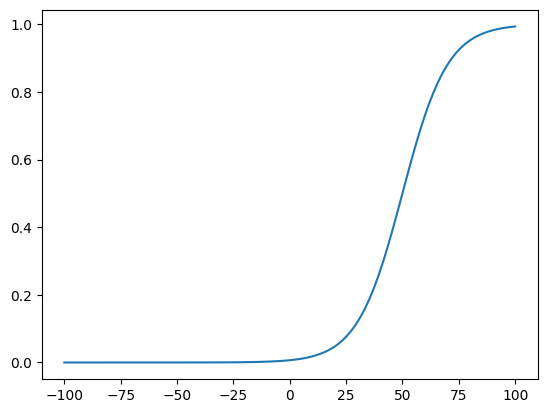

In [265]:
import matplotlib.pyplot as plt

def sigmoid_100(x):
    return 1/(1+np.exp(-(x-50)/10))

x = np.linspace(-100,100,100)
y = sigmoid_100(x)

plt.plot(x, y)